# Exploring Flexible Recommendation System Approaches

This notebook explores flexible approaches for building recommendation systems that address the limitations of static user embeddings, such as the requirement for all users to be present during the training, validation, testing, and inference phases. The goal is to build a dynamic, scalable, and adaptable recommendation system.

---

## Approaches for Flexible Recommendation Systems

### **1. Content-Based Features to Derive Embeddings Dynamically**

This approach dynamically creates embeddings based on user or item metadata rather than relying on pre-trained static embeddings. These embeddings are inferred at runtime, making them inherently flexible.

#### **Key Components**
- **Input Features**:
  - User: Demographics, preferences, purchase history, browsing history.
  - Item: Description, categories, attributes, and tags.
- **Embedding Generation**:
  - Use neural networks (e.g., Feedforward NN, Transformers) to map input features to dense vector embeddings.
  - Content towers (one for users, one for items) process their respective features.
- **Scoring**:
  - Compute compatibility or relevance scores using similarity measures like dot products or cosine similarity.

#### **Advantages**
- **Cold Start**: Works for new users or items since embeddings are derived from their attributes.
- **Scalability**: No need to retrain the model to add new users/items.
- **Customizability**: Embeddings adapt to the richness of input features.

#### **Challenges**
- **Feature Engineering**: High dependency on quality and availability of user/item metadata.
- **Bias**: Over-reliance on certain features may lead to biased recommendations.

#### **Examples**
- Content-based filtering systems using TF-IDF, Word2Vec, or neural embeddings for articles, movies, or products.

---

### **2. Hybrid Models**

Hybrid models combine collaborative filtering (CF) with content-based filtering (CBF) to leverage the strengths of both approaches.

#### **Key Components**
- **Collaborative Filtering**:
  - Extract latent factors from interaction data (e.g., Matrix Factorization, Neural CF).
- **Content-Based Filtering**:
  - Dynamically generate embeddings from user/item metadata using neural networks or classical techniques.
- **Fusion Strategies**:
  - **Concatenation**: Combine CF embeddings with CBF embeddings before scoring.
  - **Gating Mechanisms**: Use attention or learned weights to balance CF and CBF contributions.
  - **Ensemble Models**: Independently train CF and CBF models and blend their predictions.

#### **Advantages**
- **Robustness**: Handles both sparse interactions and cold starts effectively.
- **Dynamic Adaptability**: Incorporates user preferences from metadata while leveraging collaborative signals.
- **Improved Accuracy**: Better generalization from combined strengths of CF and CBF.

#### **Challenges**
- **Complexity**: Higher computational and architectural complexity.
- **Data Imbalance**: Requires balancing CF and CBF contributions during training.

#### **Examples**
- Netflix's hybrid recommendation system that combines viewing history (CF) with metadata like genres, actors, and directors (CBF).
- Neural networks blending user-item embeddings with metadata embeddings.

---

### **3. Models Agnostic to User Count**

These models do not require a fixed set of users or items, making them ideal for dynamic environments with an evolving user base.

#### **Key Approaches**
- **Meta-Learning**:
  - Train a model to generalize across tasks (e.g., user-item interactions) so it can adapt quickly to new users/items.
  - Examples: MAML (Model-Agnostic Meta-Learning).
- **Few-Shot Learning**:
  - Learn embeddings for new users/items with limited data.
  - Examples: Prototypical Networks, Siamese Networks.
- **Generalized Factorization Machines**:
  - Extends factorization models to support additional context (e.g., time, location, device).
- **Graph Neural Networks (GNNs)**:
  - Represent user-item interactions as a graph and learn embeddings for nodes (users/items) dynamically.
  - Examples: PinSage, GraphSAGE, LightGCN.

#### **Advantages**
- **Dynamic User/Item Base**: No dependency on pre-trained static embeddings.
- **Cold Start**: Handles new users/items with few interactions.
- **Scalability**: Efficient for large datasets with evolving user/item sets.

#### **Challenges**
- **Data Sparsity**: Requires robust mechanisms to handle sparse interaction data.
- **High Complexity**: GNNs and meta-learning approaches can be computationally intensive.

#### **Examples**
- Pinterest’s PinSage for dynamic recommendations.
- GNN-based recommendation systems that dynamically generate node embeddings.

---

## Summary of Approaches

| **Aspect**                  | **Content-Based Features**          | **Hybrid Models**                     | **User-Count Agnostic Models**            |
|-----------------------------|-------------------------------------|---------------------------------------|-------------------------------------------|
| **Dynamic Embeddings**      | Yes                                | Yes                                   | Yes                                       |
| **Cold Start Handling**     | Strong                             | Moderate to Strong                   | Strong                                    |
| **Complexity**              | Low to Moderate                    | High                                  | High                                      |
| **Scalability**             | High                               | Moderate                              | High                                      |
| **Training Needs**          | Metadata and content only          | Interaction and metadata              | Interaction-focused with adaptability     |
| **Examples**                | TF-IDF, Word2Vec, Content Towers   | Neural CF + Metadata, Netflix Hybrid | Meta-Learning, GNNs, Few-Shot Learning    |

---


# Understanding the Difference Between Collaborative Filtering and Content-Based Filtering

## **1. Collaborative Filtering**

### **Definition**
Collaborative filtering relies on **interaction data** (e.g., ratings, clicks) between users and items. It analyzes patterns in user-item interactions to make recommendations, often without relying on metadata about users or items.

### **Key Characteristics**
- **User-Collaborative Filtering**:
  - Finds similarities between users based on their interactions.
  - Example: "Users similar to you liked this movie."
  - Techniques:
    - User-User Similarity (e.g., k-NN).
    - Matrix Factorization (e.g., SVD, ALS).
    - Neural approaches like Autoencoders or Static Embedding Nets.
- **Item-Collaborative Filtering**:
  - Finds similarities between items based on how they are interacted with by users.
  - Example: "People who watched this movie also watched these movies."
  - Techniques:
    - Item-Item Similarity.
    - Co-occurrence-based models.

### **Dependency on Interaction Data**
- Collaborative filtering models are built entirely on **user-item interaction data** (e.g., a user-item rating matrix).
- They do not require metadata about users or items.

---

## **2. Content-Based Filtering**

### **Definition**
Content-based filtering focuses on **attributes (metadata)** of users and items to make recommendations. It matches users with items that are similar to what they have interacted with, based on the attributes of the content.

### **Key Characteristics**
- **Profiles Derived from Metadata**:
  - User profiles are based on user attributes (e.g., age, favorite genres, sex).
  - Item profiles are based on item attributes (e.g., budget, genres, overview embedding).
- **No Dependence on Interaction Data**:
  - Recommendations are generated by comparing user profiles with item profiles.
  - No need for explicit user-user or item-item interactions.

---

## **3. Differences Between Collaborative and Content-Based Filtering**

| **Aspect**                  | **Collaborative Filtering**                                                                                     | **Content-Based Filtering**                                                                                  |
|-----------------------------|----------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **Core Idea**               | Learns from patterns in user-item interactions.                                                               | Matches user and item profiles based on their metadata.                                                    |
| **Dependence on IDs**       | Requires user and item IDs to track interactions.                                                             | Does not require IDs, works purely on attributes (metadata).                                               |
| **Dependency on Metadata**  | Metadata is optional; interactions alone are sufficient.                                                      | Heavily dependent on metadata for users and items.                                                         |
| **Generalization**          | Cannot recommend items without interaction data (cold-start issue).                                           | Can generalize well to new users or items if metadata is available.                                        |
| **Example Techniques**      | Matrix Factorization, User-User Similarity, Neural Collaborative Filtering (NCF).                             | SBERT-based Profiles, One-Hot Encoding for Genres, Learned Embeddings for Attributes.                      |

---

## **4. Current Approach**

### **Key Characteristics**
- **Profiles Derived from Metadata**:
  - User profiles include attributes such as age, multi-hot encoded genres, and sex.
  - Movie profiles include numerical features (e.g., budget, runtime), multi-hot encoded genres, and text embeddings (e.g., for overviews).
- **No Dependence on Interaction Patterns**:
  - The model does not rely on user-user or item-item relationships in the interaction data.
  - It abstracts away concrete user and item IDs.

### **Conclusion**
The current approach of this notebook aligns with **content-based filtering**, as it uses metadata-driven profiles to make recommendations. For collaborative filtering, you would need to reintroduce **user and item IDs** and focus on learning from user-item interaction data.


# Content-Based Features Approach for Recommendation Systems

This notebook explores the **Content-Based Features Approach** for building a recommendation system, focusing on dynamically deriving embeddings from user and item metadata. This approach addresses the limitations of static embeddings, such as the inability to handle new users or items without retraining.

---

## **Data Pipeline and Neural Network Architecture**

### **1. Data Pipeline Architecture**

| **Stage**                | **Content-Based Approach**                                                                                    | **Static Embedding Approach (StaticEmbeddingNCF)**                                           |
|---------------------------|----------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **Input Data**            | - **User Metadata**: Features like age, location, interests, purchase history.                              | - **User IDs**: Numerical identifiers mapped to embeddings.                           |
|                           | - **Item Metadata**: Features like genre, description, attributes, tags.                                    | - **Item IDs**: Numerical identifiers mapped to embeddings.                           |
|                           | - **Interaction Data**: Ratings or implicit signals (clicks, purchases).                                    | - **Interaction Data**: Ratings or implicit signals (clicks, purchases).             |
| **Feature Engineering**   | - Normalize, encode, or embed metadata (e.g., one-hot encoding, embeddings for text).                       | - Precompute static embeddings for users and items.                                   |
|                           | - Optionally, use pre-trained embeddings for textual or categorical metadata (e.g., BERT, GloVe).           | - No direct dependency on feature engineering beyond interaction matrix setup.        |
| **Data Splitting**        | - Can include unseen users/items in test/validation sets (no fixed set of user IDs).                        | - Requires all user and item IDs to be present in train, val, test, and inference.    |
| **Data Loader Output**    | - Metadata tensors (user and item), and interaction labels (ratings).                                       | - User and item IDs, interaction labels (ratings).                                    |

---

### **2. Neural Network Architecture**

| **Component**           | **Content-Based Features**                                                                                | **Static Embedding Approach (EnhancedNCF)**                                           |
|--------------------------|----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **Embedding Generation** | - **User Content Tower**: A fully connected network maps user metadata to dense embeddings.              | - User embeddings are static, learned directly from ID mappings during training.      |
|                          | - **Item Content Tower**: A fully connected network maps item metadata to dense embeddings.              | - Item embeddings are static, learned directly from ID mappings during training.      |
|                          | - Input flexibility: Metadata embeddings can adapt dynamically for new users/items.                     | - Requires fixed embedding layers initialized for known user/item IDs.                |
| **Interaction Layer**    | - Combines dynamically generated user and item embeddings (e.g., concatenation, dot product).            | - Combines static user and item embeddings (e.g., concatenation, dot product).        |
| **Prediction Layer**     | - Fully connected layers predict interaction scores (ratings or clicks).                                | - Fully connected layers predict interaction scores.                                  |
| **Loss Function**        | - Regression loss (e.g., MSE for ratings) or classification loss (e.g., cross-entropy for implicit tasks).| - Similar loss functions; no difference in implementation.                            |

---

## **Architectural Comparison**

### **Data Flow**
- **Static Embedding (StaticEmbeddingNCF)**:
  - User and item embeddings are pre-trained for known IDs.
  - Embeddings cannot generalize to new users/items without retraining.
  - **Limitation**: Inflexible to dynamic changes in users or items.

- **Content-Based Features**:
  - User and item embeddings are computed dynamically based on their metadata.
  - System can generalize to new users/items if metadata is available.
  - **Advantage**: Flexible and handles cold starts effectively.

### **Embedding Adaptability**
- **Static Embedding**:
  - Fixed size and count for embeddings, directly tied to the number of users and items.
  - Scaling requires re-training or embedding extensions.

- **Content-Based Features**:
  - Embeddings derived from feature space, independent of dataset size.
  - No need for re-training when new users/items are introduced.

### **Cold Start Problem**
- **Static Embedding**:
  - Suffers in cold-start scenarios as new users/items lack pre-trained embeddings.

- **Content-Based Features**:
  - Resolves cold starts using metadata-derived embeddings for unseen users/items.

---

## **Data Preconditions for Content-Based Features**

1. **Metadata Availability**:
   - Sufficient and relevant metadata for users and items.
   - Examples:
     - **Users**: Age, gender, preferences, device type, location.
     - **Items**: Title, genre, description, price, category.

2. **Data Cleaning and Encoding**:
   - Normalize numerical features (e.g., Min-Max Scaling, Standardization).
   - Encode categorical features (e.g., one-hot, label encoding, or embeddings).
   - Preprocess text data (e.g., tokenization, embeddings like Word2Vec or BERT).

3. **Interaction Data**:
   - User-item interaction data (explicit ratings or implicit signals like clicks/purchases).
   - Train/test split should ensure no data leakage while including unseen users/items.

4. **Feature Balance**:
   - Ensure balanced contributions from user and item metadata to avoid overfitting on dominant feature sets.

---

## **Proposed Neural Network Architecture**

1. **Input Layers**:
   - User metadata features: $ \text{num\_user\_features} $
   - Item metadata features: $ \text{num\_item\_features} $

2. **Embedding Towers**:
   - User content tower:
     $$
     \text{User\_Embedding} = \text{FC}_{1}(\text{user\_features}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
     $$
   - Item content tower:
     $$
     \text{Item\_Embedding} = \text{FC}_{1}(\text{item\_features}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
     $$

3. **Interaction Layer**:
   - Combine user and item embeddings via concatenation or element-wise operations.
   - Example:
     $$
     \text{Combined} = [\text{User\_Embedding}, \text{Item\_Embedding}]
     $$

4. **Prediction Layer**:
   - Fully connected layers output the predicted score:
     $$
     \text{Output} = \text{FC}_{m}(\text{Combined})
     $$

5. **Loss**:
   - MSE (ratings prediction) or Cross-Entropy (implicit feedback).

---


## How Content-Based Features Replace User IDs in Recommendation Systems

In a **Content-Based Features Approach**, the architecture shifts focus from concrete user IDs (this was probably motivated from the factorization of R in P*Q) to abstract user profiles represented by metadata. This fundamentally changes how the model perceives and interacts with users, providing flexibility and generalizability.

---

### **Static Embedding Approach (User IDs)**

1. **User IDs as Input**:
   - User IDs are treated as discrete categorical values, mapped directly to static embedding vectors.
   - Example: User `123` maps to a specific embedding vector (e.g., `Embedding[123]`).

2. **Model Dependency**:
   - The model explicitly knows each user by ID.
   - To add a new user, a new embedding vector must be trained, requiring retraining of the embedding layer.

3. **Representation**:
   - The user representation is purely based on learned embeddings tied to their interactions.
   - **Problem**: This representation is non-generalizable and tightly coupled to the training data.

---

### **Content-Based Features Approach**

1. **User Metadata as Input**:
   - Users are represented by their **metadata** (e.g., age, gender, location, preferences, etc.).
   - No explicit user ID is required in the model's architecture.
   - Example: User metadata like `{"age": 25, "location": "NY", "interests": "action movies"}` is encoded into a feature vector.

2. **Model Generalization**:
   - The model does not "know" users as specific IDs.
   - Instead, it processes user metadata dynamically to generate embeddings during inference.
   - **Benefit**: New users with metadata can be represented without retraining.

3. **Representation**:
   - The user representation (embedding) is derived from their metadata features.
   - **Advantage**: This representation is generalizable and flexible for unseen users.

---

### **What Happens in the Architecture**

#### **Static Embedding Layers (Static IDs)**
- In the static approach, user IDs are fed into an embedding layer to look up a pre-trained vector:
  $$
  \text{User\_Embedding} = \text{Embedding}[User\_ID]
  $$
- This embedding is static and tied to specific user IDs.

#### **Content Towers (Metadata-Based)**
- In the content-based approach, user metadata is passed through a neural network to produce the embedding dynamically:
  $$
  \text{User\_Embedding} = \text{FC}_{1}(\text{Metadata}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
  $$
- The embedding is generated "on the fly" and is **independent of specific user IDs**.

---

### **Does the New Architecture "Know" Concrete Users?**

**No**, the new architecture does not explicitly "know" concrete users by their IDs. Instead:

- **What the Model Sees**:
  - A vectorized representation of the user's metadata.
  - This abstraction means the model processes users purely based on their characteristics, not their identities.

- **What the Model Learns**:
  - Patterns between metadata-derived embeddings and interaction outcomes (e.g., ratings, clicks).

- **Inference for New Users**:
  - For a new user with metadata, the model can derive a new embedding dynamically, even though it has never seen the user ID before.

---

### **Analogy**

Think of the static embedding approach as a school class where the teacher knows each student by their name (user ID). When a new student joins, the teacher cannot recognize or understand them without explicitly learning about them first.

In contrast, the content-based approach is like a teacher who knows about students based on their interests, skills, and behaviors (metadata). Even if a new student joins, the teacher can immediately understand them based on these characteristics, without needing to memorize their name.

---

### **Key Benefits of Removing User ID Dependency**

1. **Cold Start**:
   - New users can be served recommendations immediately if their metadata is available.

2. **Generalization**:
   - The model learns to recommend based on user characteristics rather than memorizing specific user interactions.

3. **Scalability**:
   - The system scales to millions of users without retraining embedding layers or worrying about embedding size limits.

4. **Flexibility**:
   - Users can dynamically change their preferences (metadata) and receive updated recommendations.

---

### **What About Items?**

This same principle applies to items. Instead of relying on static item IDs:
- Use **item metadata** (e.g., genres, tags, descriptions) to dynamically create embeddings.
- The model does not need to "know" specific items, allowing it to generalize to new items added to the catalog.

---


# Content-Based Features Approach: Training and Inference Workflow

## **1. Training Phase**

### **Inputs**
- **User Profiles**: Precomputed profiles based on enriched metadata (e.g., demographics, favorite genres).
- **Item Profiles**: Precomputed profiles derived from metadata (e.g., genres, plot summaries).
- **Ratings**: Interaction data linking users and items with a rating (or implicit feedback like clicks).

### **Process**
- The model learns a mapping from user and item profiles to interaction scores (ratings).
- Training data contains only users and items with known interactions.

### **Output**
- A trained model capable of predicting ratings for any user-item pair based on their profiles.

---

## **2. Inference Phase**

### **Goal**
To predict ratings (or relevance scores) for new or existing users and items, even if they were not seen during training.

### **How It Works**
1. **Existing Users and Items**:
   - The precomputed profiles are used directly.
   - The model predicts the rating for a given user-item pair.

2. **New Users (Cold Start)**:
   - Create a user profile on-the-fly using metadata (e.g., "age: 25, favorite genres: action, drama").
   - This profile is fed into the trained model alongside item profiles to generate predictions.

3. **New Items (Cold Start)**:
   - Create an item profile dynamically using metadata (e.g., "action, runtime: 90 minutes, overview: exciting thriller").
   - This profile is used with user profiles to generate predictions.

4. **New Users + New Items**:
   - Both profiles are created dynamically from metadata and used to predict ratings.

---

## **Advantages of this Approach**

1. **Cold-Start Resolution**:
   - New users and items are seamlessly integrated using their metadata, without needing interaction data.

2. **Scalability**:
   - Profiles can be generated dynamically, allowing the system to scale with minimal retraining.

3. **Flexibility**:
   - Metadata-rich environments benefit as the system learns to utilize features effectively.

---

## **Example Workflow**

### **Training**
- **Input**:
  - User Profile: `[age, num_reviews, avg_rating, embedding_favorite_genres, embedding_spending_category]`
  - Item Profile: `[budget, runtime, popularity, embedding_genres, embedding_overview]`
  - Rating: `4.5`
- **Model**:
  - Learns to map profiles to ratings.
- **Output**:
  - A trained model.

### **Inference**
- **Scenario 1: Existing User + Existing Item**:
  - Use stored profiles directly to predict the rating.
- **Scenario 2: New User**:
  - Example:
    - Metadata: `{"age": 30, "favorite_genres": "action, thriller"}`
    - Create a profile dynamically: `[30, embedding_favorite_genres]`
    - Predict ratings for items using this profile.
- **Scenario 3: New Item**:
  - Example:
    - Metadata: `{"genres": "sci-fi, adventure", "overview": "space exploration"}`
    - Create a profile dynamically: `[embedding_genres, embedding_overview]`
    - Predict ratings for users using this profile.

---

# Handling Users/Movies Without Ratings in the Content-Based Approach

## **1. Users/Movies Without Ratings in Training**

### **Assumptions**
- In **training**, only users and movies with interactions (ratings) are included. This is because:
  - The model learns the relationship between user and item profiles through interaction data.
  - Without interactions, there is no ground truth to train on.

### **Real-Life Handling**
- **Training Stage**:
  - **Users/Movies Without Ratings**:
    - These are not included in training since they lack interaction data.
    - However, their profiles are typically precomputed and stored, so they can be utilized later during inference.
  - **Cold Start in Training**:
    - For new users or items added over time, metadata (e.g., textual descriptions, genres) is used to dynamically create profiles, even if interactions are sparse.

---

## **2. Users/Movies Without Ratings During Inference**

### **Assumptions**
- In **inference**, the system must handle unseen users or movies (cold start).

### **How It Works**
- **Unseen Users**:
  - A new user's metadata is used to generate a dynamic profile (e.g., using demographic information, browsing history, or preferences).
  - This profile is fed into the model to compute recommendations, without requiring prior ratings.
- **Unseen Movies**:
  - A new movie's metadata (e.g., genres, descriptions, cast) is used to create its profile dynamically.
  - Recommendations are computed for the movie based on its profile, even if no interactions are available.

---

## **Practical Approaches to Cold Start**

1. **Content-Based Features**:
   - Dynamically derive embeddings for new users or items using metadata.
   - Example:
     - For a new user: Use their demographic or preference data (e.g., "age: 25, likes action movies").
     - For a new movie: Use its metadata (e.g., "action, runtime: 90 minutes, starring XYZ").
   - This ensures the system remains flexible and handles cold-start scenarios effectively.

2. **Pre-Trained Models**:
   - Use pre-trained embeddings (e.g., from text models like BERT or Sentence-BERT) for metadata fields.
   - This allows unseen entities to be represented consistently using their attributes.

3. **Hybrid Models**:
   - Combine content-based features with collaborative filtering during inference.
   - If sufficient interaction data becomes available for a user/movie, collaborative filtering signals augment recommendations.

---

## **Pipeline Summary for Real Life**

1. **Training**:
   - Train only on users and items with ratings (interaction data).
   - Ensure all available metadata is preprocessed for future use.

2. **Inference**:
   - Dynamically create profiles for new users and items using their metadata.
   - Leverage learned patterns to provide recommendations, even for cold-start entities.


# Building the data pipeline
The following code builds the data pipeline so that we have usable data loaders.

In [2]:
# Watch for changes
%load_ext autoreload
%autoreload 2

# Imports and configuration
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer
import os
from codebase.prep_data import ContentFeatureMovieLensDataset, multi_hot_encode_genres, one_hot_encode_sex, normalize_numeric_column, scale_one_hot_to_max, scale_multi_hot_to_embedding, encode_text

# Paths and configurations
RATINGS_PATH = 'data/ml-latest-small/ratings.csv'
MOVIES_ENRICHED_PATH = 'data/ml-latest-small/movies_enriched.csv'
USER_ENRICHED_PATH = 'data/ml-latest-small/users_enriched.csv'
USER_EMBEDDINGS_PATH = 'data/ml-latest-small/user_profiles.npy'
MOVIE_EMBEDDINGS_PATH = 'data/ml-latest-small/movie_profiles.npy'
BATCH_SIZE = 1024
MODEL_NAME = 'all-mpnet-base-v2'

os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sentence transformer model for text embeddings
text_model = SentenceTransformer(MODEL_NAME).to(device)

# Load data
ratings = pd.read_csv(RATINGS_PATH)
movies_enriched = pd.read_csv(MOVIES_ENRICHED_PATH)
users_enriched = pd.read_csv(USER_ENRICHED_PATH)

print(f"Unique Users in ratings: {ratings['userId'].nunique()}")

# Step 1: Restrict valid_user_ids and valid_movie_ids to those in ratings
valid_user_ids = set(ratings['userId'].unique()).intersection(set(users_enriched['userId'].unique()))
valid_movie_ids = set(ratings['movieId'].unique()).intersection(set(movies_enriched['movieId'].unique()))

print(f"Number of valid users: {len(valid_user_ids)}")
print(f"Number of valid movies: {len(valid_movie_ids)}")

# Filter ratings to include only valid userIds and movieIds
ratings = ratings[
    (ratings['userId'].isin(valid_user_ids)) &
    (ratings['movieId'].isin(valid_movie_ids))
]

print(f"Number of ratings after filtering: {len(ratings)}")

# Create mappings from userId and movieId to indices
user_id_to_index = {user_id: idx for idx, user_id in enumerate(valid_user_ids)}
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(valid_movie_ids)}

# Add profile indices to the ratings dataframe
# map expects a dictionary and can then map the values of the column to the keys of the dictionary
ratings['userIndex'] = ratings['userId'].map(user_id_to_index) 
ratings['movieIndex'] = ratings['movieId'].map(movie_id_to_index)

# Create a dictionary mapping each user to their interacted movies
user_to_interacted_movies = (
    ratings.groupby("userIndex")["movieIndex"].apply(list).to_dict()
)

# Step 2: Precompute User and Movie Profiles
def create_user_profiles(users_df):
    """Create user profiles using age, sex, and favorite_genres."""
    all_genres = sorted(set(','.join(users_enriched['favorite_genres'].dropna()).split(',')))
    print("All Genres:", all_genres)
        
    users_df['favorite_genres'] = users_df['favorite_genres'].fillna('')
    users_df['sex'] = users_df['sex'].fillna('Unknown')

    # Encode favorite genres using multi-hot encoding
    user_genres_encoded = multi_hot_encode_genres(users_enriched, all_genres, split=',', genres_column='favorite_genres')

    # One-hot encode sex
    user_sex_one_hot = one_hot_encode_sex(users_df, 'sex')

    # Normalize numerical feature: age
    users_df = normalize_numeric_column(users_df, 'age')

    # Combine numerical features and embeddings (without one-hot yet)
    profiles_without_one_hot = []
    for i, row in users_df.iterrows():
        profile = np.concatenate((
            np.array([row['age']]),   # Numerical features
            user_genres_encoded[i] # Favorite genres embedding
        ))
        profiles_without_one_hot.append(profile)

    # Convert profiles to a NumPy array for scaling
    profiles_without_one_hot = np.array(profiles_without_one_hot)

    # Dynamically scale the one-hot features
    user_sex_scaled = scale_one_hot_to_max(user_sex_one_hot, profiles_without_one_hot)

    # Append the scaled one-hot features to the profiles
    user_profiles = []
    for i in range(len(users_df)):
        profile = np.concatenate((
            profiles_without_one_hot[i],
            user_sex_scaled[i]
        ))
        user_profiles.append(profile)

    return np.array(user_profiles)

def create_movie_profiles(movies_df):
    """Create movie profiles by combining numerical, text, and multi-hot features."""
    
    all_genres = sorted(set('|'.join(movies_enriched['genres'].dropna()).split('|')))
    print("All Genres:", all_genres)

    # Multi-hot encode genres
    movie_genres_encoded = multi_hot_encode_genres(movies_df, all_genres, split='|')

    # Generate embeddings for overview
    movie_overview_embeddings = encode_text(movies_df['overview'].tolist(), text_model)

    # Scale multi-hot encoded genres to match the embedding max value
    scaled_movie_genres = scale_multi_hot_to_embedding(movie_genres_encoded, movie_overview_embeddings)

    # Normalize numerical features
    for col in ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']:
        if col in movies_df.columns:
            # Replace NaN values with 0 before normalization
            movies_df[col] = movies_df[col].fillna(0)
            # Normalize the column
            movies_df = normalize_numeric_column(movies_df, col)

    # Combine all features into profiles
    movie_profiles = []
    for i, row in movies_df.iterrows():
        profile = np.concatenate((
            np.array([row[col] for col in ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]),
            movie_overview_embeddings[i],
            scaled_movie_genres[i]
        ))
        movie_profiles.append(profile)

    return np.array(movie_profiles)

# Step 3: Check and create/load profiles
if os.path.exists(USER_EMBEDDINGS_PATH):
    print("Loading user profiles from disk...")
    user_profiles = np.load(USER_EMBEDDINGS_PATH)
else:
    print("Creating user profiles...")
    user_profiles = create_user_profiles(
        users_enriched[users_enriched['userId'].isin(valid_user_ids)].reset_index(drop=True))
    
    np.save(USER_EMBEDDINGS_PATH, user_profiles)
    print("User profiles saved to disk.")

if os.path.exists(MOVIE_EMBEDDINGS_PATH):
    print("Loading movie profiles from disk...")
    movie_profiles = np.load(MOVIE_EMBEDDINGS_PATH)
else:
    print("Creating movie profiles...")
    movie_profiles = create_movie_profiles(
        movies_enriched[movies_enriched['movieId'].isin(valid_movie_ids)].reset_index(drop=True))
    
    np.save(MOVIE_EMBEDDINGS_PATH, movie_profiles)
    print("Movie profiles saved to disk.")

# Step 4: Temporal split of ratings data
def temporal_split(ratings_df):
    """Split ratings data into train, validation, and test sets temporally."""
    ratings_df = ratings_df.sort_values('timestamp')
    train_end = int(0.7 * len(ratings_df))
    val_end = int(0.85 * len(ratings_df))
    train_data = ratings_df.iloc[:train_end]
    val_data = ratings_df.iloc[train_end:val_end]
    test_data = ratings_df.iloc[val_end:]
    return train_data, val_data, test_data

train_data, val_data, test_data = temporal_split(ratings)

# Step 6: Create Dataloaders
train_dataset = ContentFeatureMovieLensDataset(train_data, user_profiles, movie_profiles)
val_dataset = ContentFeatureMovieLensDataset(val_data, user_profiles, movie_profiles)
test_dataset = ContentFeatureMovieLensDataset(test_data, user_profiles, movie_profiles)

class CustomDataLoader(DataLoader):
    def __init__(self, dataset, *args, **kwargs):
        super().__init__(dataset, *args, **kwargs)
        # Copy the mode property from the dataset
        self.mode = getattr(dataset, "mode", None)

train_loader = CustomDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=16)
val_loader = CustomDataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=16)
test_loader = CustomDataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=16)

print("Data preparation complete!")
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Test the dataloaders
for user, movie, rating in train_loader:
    print("User shape (Train):", user.shape)
    print("Movie shape (Train):", movie.shape)
    print("Rating shape: (Train)", rating.shape)
    break


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Unique Users in ratings: 610
Number of valid users: 610
Number of valid movies: 9724
Number of ratings after filtering: 100836
Loading user profiles from disk...
Loading movie profiles from disk...
Data preparation complete!
Train samples: 70585
Validation samples: 15125
Test samples: 15126
User shape (Train): torch.Size([1024, 21])
Movie shape (Train): torch.Size([1024, 793])
Rating shape: (Train) torch.Size([1024])


## Let's inspect the data and the pipeline we just created:

### Test the data loader in train mode

In [7]:
# Example: Testing the ContentFeatureMovieLensDataset
def test_dataset_train_mode(dataset, num_samples=10):
    """
    Test the ContentFeatureMovieLensDataset to verify it repeats user_profiles for corresponding movie_items.
    Args:
        dataset (Dataset): The dataset to test.
        num_samples (int): Number of samples to print for testing.
    """
    print("Testing the dataset...\n")
    print("Sample outputs (user_profile, movie_profile, rating):\n")

    for i in range(min(num_samples, len(dataset))):
        user_profile, movie_profile, rating = dataset[i]
        print(f"User Profile: {user_profile.numpy()[:5]}...")  # Print first 5 values of user profile
        print(f"Movie Profile: {movie_profile.numpy()[:5]}...")  # Print first 5 values of movie profile
        print(f"Rating: {rating.item()}")
        print("-" * 50)

# Create a test dataset instance
# Assuming you already have these variables from your preprocessing:
# - ratings (DataFrame with 'userIndex', 'movieIndex', 'rating')
# - user_profiles (numpy array)
# - movie_profiles (numpy array)

test_dataset_instance = ContentFeatureMovieLensDataset(ratings, user_profiles, movie_profiles, mode='train')

# Test the dataset
test_dataset_train_mode(test_dataset_instance, num_samples=10)

Testing the dataset...

Sample outputs (user_profile, movie_profile, rating):

User Profile: [0.44680852 1.         0.         0.         0.        ]...
Movie Profile: [0.07915568 0.24803227 0.13893653 0.89561796 0.5019906 ]...
Rating: 4.0
--------------------------------------------------
User Profile: [0.44680852 1.         0.         0.         0.        ]...
Movie Profile: [0.06596306 0.02415679 0.17324185 0.7303371  0.01033486]...
Rating: 4.0
--------------------------------------------------
User Profile: [0.44680852 1.         0.         0.         0.        ]...
Movie Profile: [0.15831135 0.12664984 0.2915952  0.8876405  0.19914377]...
Rating: 4.0
--------------------------------------------------
User Profile: [0.44680852 1.         0.         0.         0.        ]...
Movie Profile: [0.01583114 0.0815604  0.18181819 0.9188764  0.28340423]...
Rating: 5.0
--------------------------------------------------
User Profile: [0.44680852 1.         0.         0.         0.        ]...

### Now test it in eval mode:

In [9]:
def test_eval_mode(dataset, num_samples=5):
    """
    Test the ContentFeatureMovieLensDataset in evaluation mode.
    Args:
        dataset (Dataset): The dataset in eval mode to test.
        num_samples (int): Number of user profiles to print and check.
    """
    print("Testing the dataset in eval mode...\n")
    
    for i in range(min(num_samples, len(dataset))):
        user_profile, movie_profiles = dataset[i]  # Get a user profile with all movies

        print(f"User {i + 1}:")
        print(f"User Profile Shape: {user_profile.shape}")  # Should be [profile_dim]
        print(f"Movie Profiles Shape: {movie_profiles.shape}")  # Should be [num_movies, profile_dim]
        print("-" * 50)

# Create an evaluation dataset instance
eval_dataset = ContentFeatureMovieLensDataset(
    ratings=ratings,               # The ratings DataFrame
    user_profiles=user_profiles,   # User profile embeddings
    movie_profiles=movie_profiles, # Movie profile embeddings
    all_movies=None,               # Use all movies
    mode='eval'                    # Set mode to 'eval'
)

# Test the dataset in eval mode
test_eval_mode(eval_dataset, num_samples=5)

Testing the dataset in eval mode...

User 1:
User Profile Shape: torch.Size([21])
Movie Profiles Shape: torch.Size([1, 9724, 793])
--------------------------------------------------
User 2:
User Profile Shape: torch.Size([21])
Movie Profiles Shape: torch.Size([1, 9724, 793])
--------------------------------------------------
User 3:
User Profile Shape: torch.Size([21])
Movie Profiles Shape: torch.Size([1, 9724, 793])
--------------------------------------------------
User 4:
User Profile Shape: torch.Size([21])
Movie Profiles Shape: torch.Size([1, 9724, 793])
--------------------------------------------------
User 5:
User Profile Shape: torch.Size([21])
Movie Profiles Shape: torch.Size([1, 9724, 793])
--------------------------------------------------


/tmp/ipykernel_967033/4012004834.py:312: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  movie_profiles = torch.tensor(self.movie_profiles, dtype=torch.float32)


In [2]:
import numpy as np

def analyze_nan_in_movie_profiles(movie_profiles, column_structure):
    """
    Analyze `movie_profiles` for NaN values and identify affected columns and profiles.
    Args:
        movie_profiles (np.ndarray): Array of movie profiles.
        column_structure (dict): Dictionary defining column ranges for each feature type.
            Example: {
                "numerical_features": (0, 5),  # Start and end index for numerical features
                "overview_embedding": (5, 773),
                "scaled_genres": (773, 791)
            }
    Returns:
        dict: Analysis results, including affected column groups and profile count.
    """
    nan_counts = {}
    total_nan_profiles = 0

    # Analyze each feature group based on column structure
    for feature, (start, end) in column_structure.items():
        feature_data = movie_profiles[:, start:end]
        nan_mask = np.isnan(feature_data)
        nan_count = np.sum(nan_mask)
        nan_profiles = np.sum(np.any(nan_mask, axis=1))  # Profiles with at least one NaN in this range

        nan_counts[feature] = {
            "total_nans": nan_count,
            "affected_profiles": nan_profiles
        }
        total_nan_profiles += nan_profiles

    # Ensure total_nan_profiles isn't double-counted
    total_nan_profiles = np.sum(np.any(np.isnan(movie_profiles), axis=1))

    return {
        "nan_counts": nan_counts,
        "total_nan_profiles": total_nan_profiles
    }

# Define the column structure
column_structure = {
    "numerical_features": (0, 5),
    "overview_embedding": (5, 773),
    "scaled_genres": (773, 791)
}

# Analyze NaN values in movie_profiles
nan_analysis = analyze_nan_in_movie_profiles(movie_profiles, column_structure)

# Display results
print("NaN Analysis Results:")
for feature, stats in nan_analysis["nan_counts"].items():
    print(f"{feature}: Total NaNs = {stats['total_nans']}, Affected Profiles = {stats['affected_profiles']}")

print(f"Total Profiles with NaN Values: {nan_analysis['total_nan_profiles']}")


NaN Analysis Results:
numerical_features: Total NaNs = 0, Affected Profiles = 0
overview_embedding: Total NaNs = 0, Affected Profiles = 0
scaled_genres: Total NaNs = 0, Affected Profiles = 0
Total Profiles with NaN Values: 0


In [ ]:
# Validate user_profiles
num_unique_users = ratings['userId'].nunique()
assert user_profiles.shape[0] == num_unique_users, (
    f"Mismatch: user_profiles has {user_profiles.shape[0]} rows, "
    f"but ratings.csv has {num_unique_users} unique userId values."
)
print("Validation passed: user_profiles matches the number of unique users in ratings.csv.")

# Validate movie_profiles
num_unique_movies = ratings['movieId'].nunique()
assert movie_profiles.shape[0] == num_unique_movies, (
    f"Mismatch: movie_profiles has {movie_profiles.shape[0]} rows, "
    f"but ratings.csv has {num_unique_movies} unique movieId values."
)
print("Validation passed: movie_profiles matches the number of unique movies in ratings.csv.")

# Fetch a single batch of data from the train loader
sample_batch = next(iter(train_loader))

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings = sample_batch

# Convert tensors to numpy arrays for inspection
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# Verify alignment
print("Verifying alignment of user profiles, movie profiles, and ratings:")
for i in range(5):  # Check the first 5 rows
    print(f"User Profile {i + 1}: {user_profiles[i][:5]}...")  # Show first few values for brevity
    print(f"Movie Profile {i + 1}: {movie_profiles[i][:5]}...")  # Show first few values for brevity
    print(f"Rating {i + 1}: {ratings[i]}")
    print("-" * 50)

print("Max value in user_profiles:", np.max(user_profiles))
print("Min value in user_profiles:", np.min(user_profiles))
print("Max value in movie_profiles:", np.max(movie_profiles))
print("Min value in movie_profiles:", np.min(movie_profiles))

print()

assert not np.any(np.isnan(user_profiles)), "NaN values found in user_profiles!"
assert not np.any(np.isinf(user_profiles)), "Infinite values found in user_profiles!"
assert not np.any(np.isnan(movie_profiles)), "NaN values found in movie_profiles!"
assert not np.any(np.isinf(movie_profiles)), "Infinite values found in movie_profiles!"

def check_nan_in_dataloader(data_loader):
    """
    Check for NaN values in user_profiles, movie_profiles, and ratings from a DataLoader.
    Args:
        data_loader (DataLoader): The PyTorch DataLoader to check.
    Returns:
        dict: Contains the count of batches with NaN values and examples if found.
    """
    nan_details = {
        "user_profiles": 0,
        "movie_profiles": 0,
        "ratings": 0,
        "example_batch": None
    }

    for batch_idx, (user_profiles, movie_profiles, ratings) in enumerate(data_loader):
        # Check for NaN in user_profiles
        if torch.isnan(user_profiles).any():
            nan_details["user_profiles"] += 1

        # Check for NaN in movie_profiles
        if torch.isnan(movie_profiles).any():
            nan_details["movie_profiles"] += 1

        # Check for NaN in ratings
        if torch.isnan(ratings).any():
            nan_details["ratings"] += 1

        # If any NaN values are found, store an example batch
        if (nan_details["user_profiles"] > 0 or 
            nan_details["movie_profiles"] > 0 or 
            nan_details["ratings"] > 0) and nan_details["example_batch"] is None:
            nan_details["example_batch"] = {
                "batch_idx": batch_idx,
                "user_profiles": user_profiles,
                "movie_profiles": movie_profiles,
                "ratings": ratings
            }

    return nan_details

nan_check_result = check_nan_in_dataloader(train_loader)
print()

# Display the results
print("NaN Check Results:")
print(f"NaN in user_profiles: {nan_check_result['user_profiles']} batches")
print(f"NaN in movie_profiles: {nan_check_result['movie_profiles']} batches")
print(f"NaN in ratings: {nan_check_result['ratings']} batches")

if nan_check_result["example_batch"] is not None:
    print("\nExample Batch with NaN Values:")
    example_batch = nan_check_result["example_batch"]
    print(f"Batch Index: {example_batch['batch_idx']}")
    print(f"User Profiles:\n{example_batch['user_profiles']}")
    print(f"Movie Profiles:\n{example_batch['movie_profiles']}")
    print(f"Ratings:\n{example_batch['ratings']}")
else:
    print("No NaN values found in the data loader!")

Validation passed: user_profiles matches the number of unique users in ratings.csv.
Validation passed: movie_profiles matches the number of unique movies in ratings.csv.


ERROR:tornado.general:SEND Error: Host unreachable


In [4]:
def find_max_value_profile(profiles, start_index, end_index):
    """
    Find the profile index with the maximum value over all embedding dimensions.
    Args:
        profiles (np.ndarray): Profiles array (user or movie profiles).
        start_index (int): Starting index for embedding dimensions (e.g., 1 or 4).
    Returns:
        dict: Information about the profile with the maximum value.
    """
    # Extract embedding dimensions
    embeddings = profiles[:, start_index:end_index]

    # Find the maximum value and its location
    max_value = np.max(embeddings)
    profile_index = np.argmax(np.max(embeddings, axis=1))

    # Return details
    return {
        "profile_index": profile_index,
        "max_value": max_value,
        "profile_values": profiles[profile_index],
    }

import numpy as np

def find_users_with_multiple_genres(user_profiles, threshold=1):
    """
    Find user profiles with more than one genre assigned.
    Args:
        user_profiles (np.ndarray): User profiles encoded with the structure:
            - 1st column: age
            - Next 18 columns: multi-hot encoded genres
            - Last 2 columns: sex (one-hot encoded).
    Returns:
        dict: {
            "count": Number of matching user profiles,
            "example_profile": One example profile with multiple genres.
        }
    """
    # Extract the genre columns (2nd to 19th columns, 0-indexed)
    genre_columns = user_profiles[:, 1:19]

    # Find profiles with more than one genre assigned
    multiple_genres_mask = np.sum(genre_columns, axis=1) > threshold
    matching_profiles = user_profiles[multiple_genres_mask]

    # Return the count and one example (if available)
    return {
        "count": len(matching_profiles),
        "example_profile": matching_profiles[0] if len(matching_profiles) > 0 else None
    }


# Find the user with the maximum age
print(f"Max value profile: {find_max_value_profile(user_profiles, start_index=1, end_index=20)}")
print()
print(f"Users with multiple genres: {find_users_with_multiple_genres(user_profiles, 2)}")

Max value profile: {'profile_index': 0, 'max_value': 1.0, 'profile_values': array([0.4893617, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 1.       ], dtype=float32)}

Users with multiple genres: {'count': 275, 'example_profile': array([0.14893617, 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        ], dtype=float32)}


Let's visualize data from the created loaders.

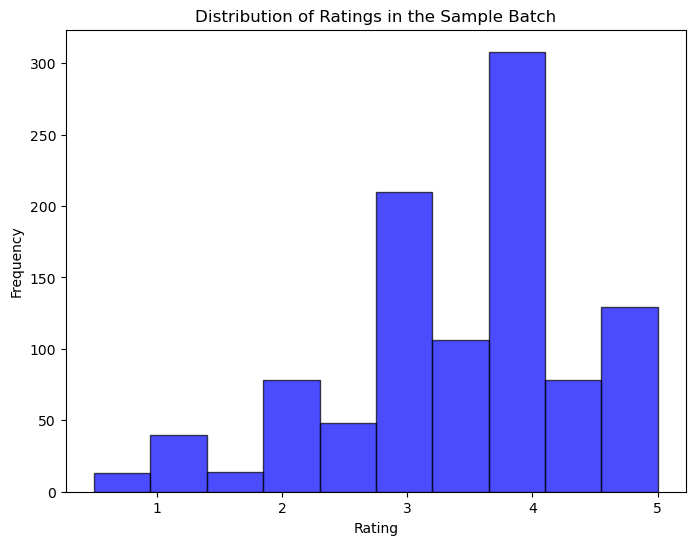

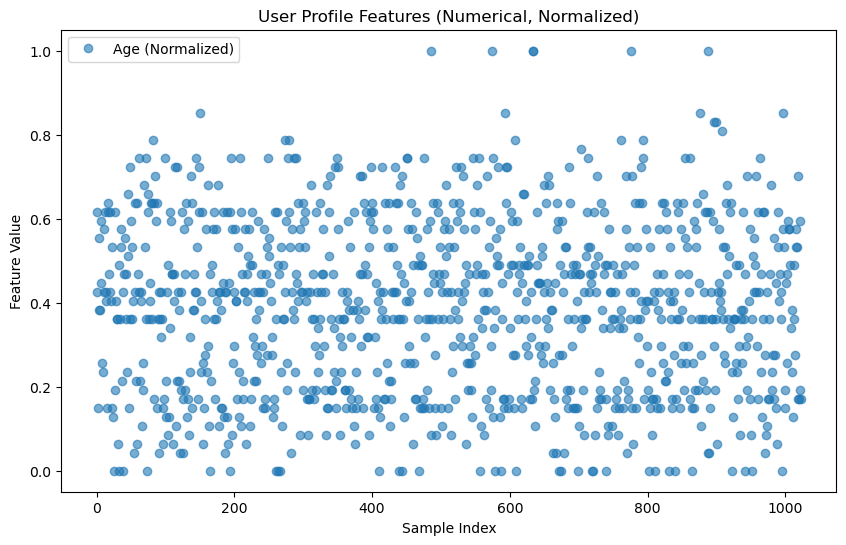

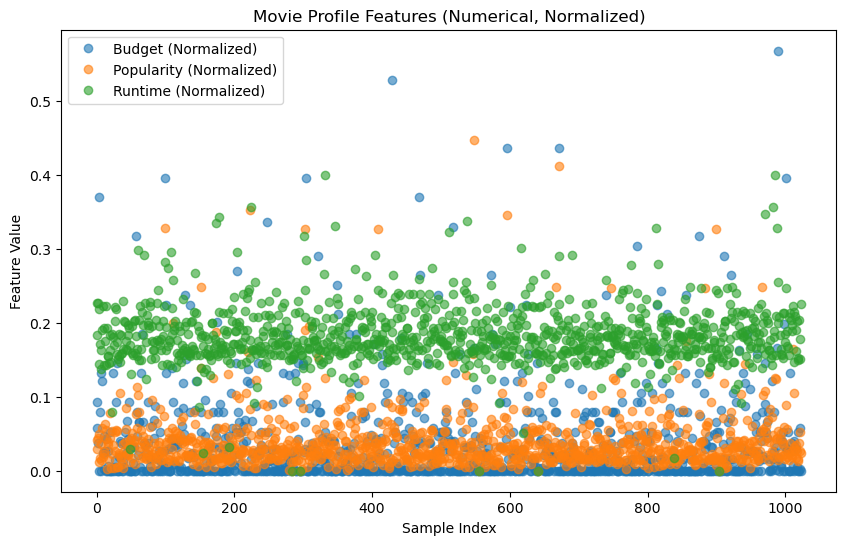

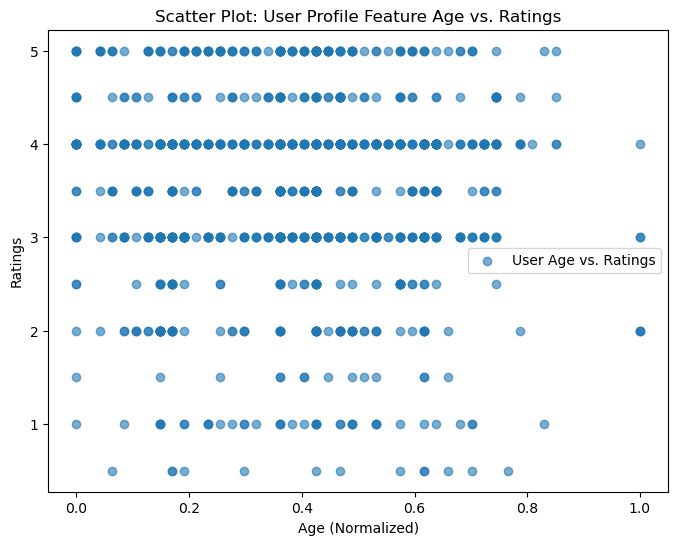

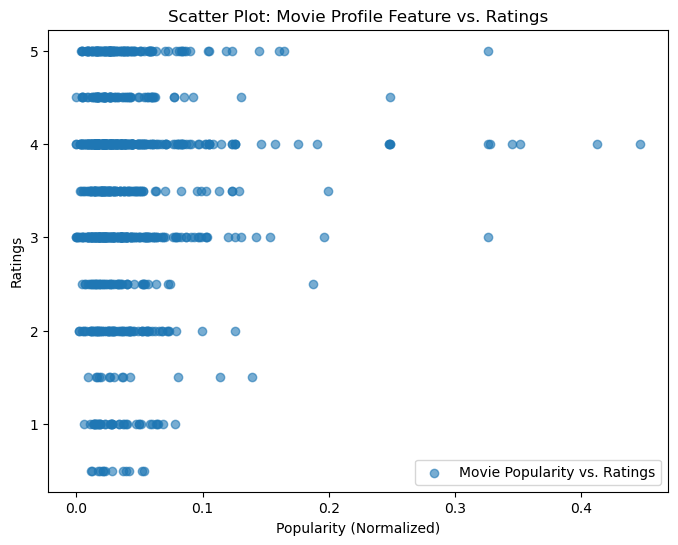

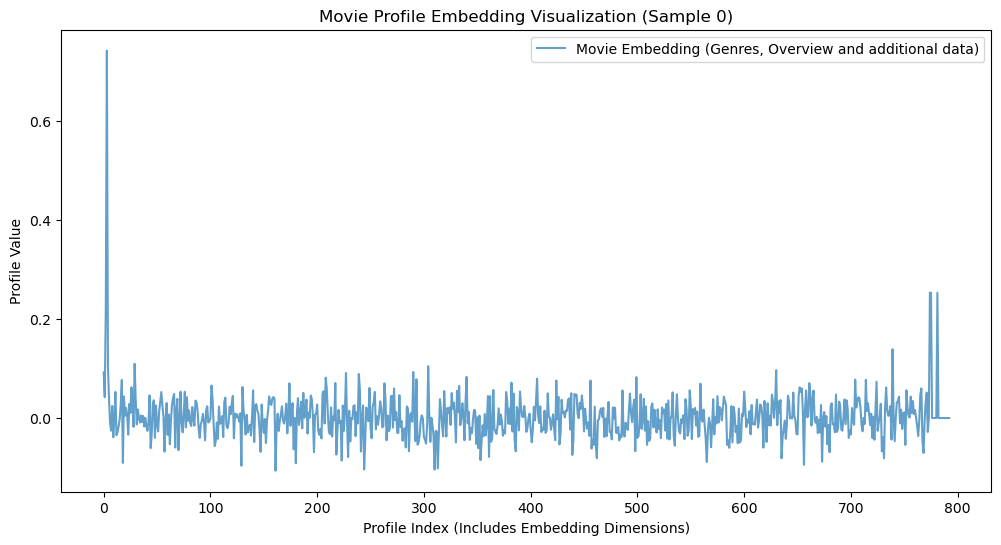

In [5]:
import matplotlib.pyplot as plt

# Helper function to fetch a batch of data from the DataLoader
def get_sample_batch(loader):
    """Fetch a single batch of data from a DataLoader."""
    for batch in loader:
        return batch  # Return the first batch

# Extract a sample batch from the train loader
sample_batch = get_sample_batch(train_loader)

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings = sample_batch

# Convert tensors to numpy for visualization
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# 1. Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Ratings in the Sample Batch")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 2. Visualize numerical features from user profiles (the only numerical feature: age)
plt.figure(figsize=(10, 6))
plt.plot(user_profiles[:, 0], 'o', label='Age (Normalized)', alpha=0.6)
plt.title("User Profile Features (Numerical, Normalized)")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

# 3. Visualize numerical features from movie profiles (first 3 numerical features)
plt.figure(figsize=(10, 6))
plt.plot(movie_profiles[:, 0], 'o', label='Budget (Normalized)', alpha=0.6)
plt.plot(movie_profiles[:, 1], 'o', label='Popularity (Normalized)', alpha=0.6)
plt.plot(movie_profiles[:, 2], 'o', label='Runtime (Normalized)', alpha=0.6)
plt.title("Movie Profile Features (Numerical, Normalized)")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

# 4. Visualize the relationship between a user profile feature and ratings
plt.figure(figsize=(8, 6))
plt.scatter(user_profiles[:, 0], ratings, alpha=0.6, label="User Age vs. Ratings")
plt.title("Scatter Plot: User Profile Feature Age vs. Ratings")
plt.xlabel("Age (Normalized)")
plt.ylabel("Ratings")
plt.legend()
plt.show()

# 5. Visualize the relationship between a movie profile feature and ratings
plt.figure(figsize=(8, 6))
plt.scatter(movie_profiles[:, 1], ratings, alpha=0.6, label="Movie Popularity vs. Ratings")
plt.title("Scatter Plot: Movie Profile Feature vs. Ratings")
plt.xlabel("Popularity (Normalized)")
plt.ylabel("Ratings")
plt.legend()
plt.show()

# Inspect embeddings for a random movie profile
plt.figure(figsize=(12, 6))
plt.plot(movie_profiles[0, 0:], label="Movie Embedding (Genres, Overview and additional data)", alpha=0.7)
plt.title("Movie Profile Embedding Visualization (Sample 0)")
plt.xlabel("Profile Index (Includes Embedding Dimensions)")
plt.ylabel("Profile Value")
plt.legend()
plt.show()

You may wonder why the Profile Index (Includes Embedding Dimensions) are larger than the embedding dimension of a single SBERT encoded text. This is because the final embedding vector contains multiple embeddings, the numerical embeddings as textual embeddings too.

**User Profile**
Numerical Features:

Age, genres, sex = 1(age) + number(genres) + 2(sex) dimensions.

Total Dimensions:
1(Numerical) + 18(Genres one-hot) + 2(Categorial) = 21 dimensions.


**Movie Profile**
Numerical Features:

Budget, popularity, runtime, vote_average, vote_count = 5 dimensions.

Genres = 18

***Embeddings***:
Overview embedding = 768 dimensions.

5 (Numerical) + 18 (Genres) + 768 (Overview) = 791 dimensions.

Let us inspect some rows of the loaders:

In [9]:
# Fetch a single batch of data from the train loader
sample_batch = next(iter(train_loader))

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings = sample_batch

# Convert tensors to numpy arrays for inspection
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# Print 5 rows of user profiles
print("Sample User Profiles (5 rows):")
for i in range(5):
    print(f"User {i + 1} Profile: {user_profiles[i]}")

# Print 5 rows of movie profiles
print("\nSample Movie Profiles (5 rows):")
for i in range(5):
    print(f"Movie {i + 1} Profile: {movie_profiles[i]}")

# Print 5 ratings corresponding to the above profiles
print("\nSample Ratings (5 values):")
for i in range(5):
    print(f"Rating {i + 1}: {ratings[i]}")



Sample User Profiles (5 rows):
User 1 Profile: [0.10638298 0.         0.         0.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.        ]
User 2 Profile: [0.70212764 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         1.         0.        ]
User 3 Profile: [0.42553192 1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         1.        ]
User 4 Profile: [0.3617021 0.        0.        1.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        1.        0.        0.        0.        0.        1.       ]
User 5 Profile: [0.04255319 1.         0.         0.         0.      

In [12]:
import torch
import torch.nn as nn

class RecommendationNet(nn.Module):
    def __init__(self, user_dim, movie_dim, hidden_dim=128, dropout_rate=0.2):
        """
        A neural network for learning user and movie interactions.
        Args:
            user_dim (int): Dimensionality of user profiles.
            movie_dim (int): Dimensionality of movie profiles.
            hidden_dim (int): Number of units in the hidden layers.
        """
        super(RecommendationNet, self).__init__()

        # User feature embedding
        self.user_embedding = nn.Sequential(
            nn.Linear(user_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )

        # Movie feature embedding
        self.movie_embedding = nn.Sequential(
            nn.Linear(movie_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )

        # Combined layers
        self.fc1 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, user_profile, movie_profile):
        """
        Forward pass through the network.
        Args:
            user_profile (torch.Tensor): User profile input.
            movie_profile (torch.Tensor): Movie profile input.
        Returns:
            torch.Tensor: Predicted score (e.g., rating).
        """
        # Process user and movie profiles
        user_embed = self.user_embedding(user_profile)
        movie_embed = self.movie_embedding(movie_profile)

        # Concatenate embeddings
        combined = torch.cat([user_embed, movie_embed], dim=1)

        # Hidden layers and output
        x = torch.relu(self.fc1(combined))
        output = self.fc2(x)
        return output


The training code:

In [3]:
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier initialization
        if m.bias is not None:
            nn.init.zeros_(m.bias)

def train(model, optimizer, criterion, num_epochs=10, patience=3, model_path='saved_weights/rec-net/best_model.pth'):

    # Early stopping variables
    best_val_loss = float('inf')
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        # Training loop
        for user_profile, movie_profile, rating in train_loader:
            user_profile = user_profile.to(device)
            movie_profile = movie_profile.to(device)
            rating = rating.to(device).view(-1, 1)  # Ensure rating is a column vector

            # Forward pass
            predictions = model(user_profile, movie_profile)   
            loss = criterion(predictions, rating)        

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Calculate average training loss
        avg_train_loss = total_loss / len(train_loader)

        # Validation loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for user_profile, movie_profile, rating in val_loader:
                user_profile = user_profile.to(device)
                movie_profile = movie_profile.to(device)
                rating = rating.to(device).view(-1, 1)

                predictions = model(user_profile, movie_profile)
                loss = criterion(predictions, rating)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_without_improvement = 0
            torch.save(model.state_dict(), model_path)  # Save the best model
        else:
            epochs_without_improvement += 1

        # Log progress
        print(f"Epoch [{epoch + 1}/{num_epochs}], "
            f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Check for early stopping
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs!")
            break

    # Load the best model after early stopping
    model.load_state_dict(torch.load(model_path, weights_only=True))
    print("Training complete! Best model loaded.")

    return avg_val_loss

Use Optuna to do a hyperparameter search.

In [4]:
import optuna
import torch.nn as nn
import torch.optim as optim

def objective(trial):
    # Hyperparameter search space
    hidden_dim = trial.suggest_int("hidden_dim", 64, 512, step=32)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)

    # Instantiate model
    user_dim = user_profiles.shape[1]
    movie_dim = movie_profiles.shape[1]
    
    model = RecommendationNet(user_dim, movie_dim, hidden_dim, dropout_rate).to(device)
    model.apply(initialize_weights)

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    return train(model, optimizer, criterion, num_epochs, patience, model_path='saved_weights/rec-net/best_model_optuna.pth')

In [5]:
# Create a study
study = optuna.create_study(direction="minimize")  # Minimize validation loss
study.optimize(objective, n_trials=25)  # Run 25 trials

# Print best hyperparameters
print("Best hyperparameters:")
print(study.best_params)
print("Best validation loss:")
print(study.best_value)

[I 2024-12-22 11:43:32,001] A new study created in memory with name: no-name-594656f5-29b5-4fa0-a551-408d896718cf


Epoch [1/50], Train Loss: 9.6252, Val Loss: 6.8087
Epoch [2/50], Train Loss: 3.4517, Val Loss: 1.5820
Epoch [3/50], Train Loss: 1.2613, Val Loss: 1.2126
Epoch [4/50], Train Loss: 1.1908, Val Loss: 1.1865
Epoch [5/50], Train Loss: 1.1651, Val Loss: 1.1650
Epoch [6/50], Train Loss: 1.1412, Val Loss: 1.1462
Epoch [7/50], Train Loss: 1.1185, Val Loss: 1.1314
Epoch [8/50], Train Loss: 1.1017, Val Loss: 1.1179
Epoch [9/50], Train Loss: 1.0862, Val Loss: 1.1073
Epoch [10/50], Train Loss: 1.0719, Val Loss: 1.0971
Epoch [11/50], Train Loss: 1.0569, Val Loss: 1.0891
Epoch [12/50], Train Loss: 1.0477, Val Loss: 1.0805
Epoch [13/50], Train Loss: 1.0370, Val Loss: 1.0745
Epoch [14/50], Train Loss: 1.0285, Val Loss: 1.0681
Epoch [15/50], Train Loss: 1.0220, Val Loss: 1.0625
Epoch [16/50], Train Loss: 1.0129, Val Loss: 1.0589
Epoch [17/50], Train Loss: 1.0067, Val Loss: 1.0533
Epoch [18/50], Train Loss: 0.9997, Val Loss: 1.0481
Epoch [19/50], Train Loss: 0.9944, Val Loss: 1.0449
Epoch [20/50], Train 

[I 2024-12-22 11:44:59,788] Trial 0 finished with value: 1.0033985733985902 and parameters: {'hidden_dim': 384, 'learning_rate': 3.1605693802740675e-05, 'dropout_rate': 0.1}. Best is trial 0 with value: 1.0033985733985902.


Epoch [50/50], Train Loss: 0.8725, Val Loss: 1.0034
Early stopping triggered after 50 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 4.5667, Val Loss: 1.2304
Epoch [2/50], Train Loss: 1.1529, Val Loss: 1.1666
Epoch [3/50], Train Loss: 1.0900, Val Loss: 1.1205
Epoch [4/50], Train Loss: 1.0482, Val Loss: 1.0849
Epoch [5/50], Train Loss: 1.0228, Val Loss: 1.0638
Epoch [6/50], Train Loss: 0.9984, Val Loss: 1.0458
Epoch [7/50], Train Loss: 0.9806, Val Loss: 1.0309
Epoch [8/50], Train Loss: 0.9627, Val Loss: 1.0195
Epoch [9/50], Train Loss: 0.9470, Val Loss: 1.0115
Epoch [10/50], Train Loss: 0.9347, Val Loss: 1.0051
Epoch [11/50], Train Loss: 0.9225, Val Loss: 1.0000
Epoch [12/50], Train Loss: 0.9120, Val Loss: 0.9966
Epoch [13/50], Train Loss: 0.9003, Val Loss: 0.9926
Epoch [14/50], Train Loss: 0.8914, Val Loss: 0.9891
Epoch [15/50], Train Loss: 0.8833, Val Loss: 0.9876
Epoch [16/50], Train Loss: 0.8741, Val Loss: 0.9865
Epoch [17/50], Train Loss: 0.8684, Val Loss: 

[I 2024-12-22 11:45:42,721] Trial 1 finished with value: 0.9867897550264995 and parameters: {'hidden_dim': 352, 'learning_rate': 0.00011925627654018887, 'dropout_rate': 0.4}. Best is trial 1 with value: 0.9867897550264995.


Epoch [24/50], Train Loss: 0.8279, Val Loss: 0.9868
Early stopping triggered after 24 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 2.3256, Val Loss: 1.1282
Epoch [2/50], Train Loss: 1.0453, Val Loss: 1.0513
Epoch [3/50], Train Loss: 0.9925, Val Loss: 1.0186
Epoch [4/50], Train Loss: 0.9531, Val Loss: 1.0008
Epoch [5/50], Train Loss: 0.9269, Val Loss: 0.9989
Epoch [6/50], Train Loss: 0.9040, Val Loss: 0.9998
Epoch [7/50], Train Loss: 0.8860, Val Loss: 0.9858
Epoch [8/50], Train Loss: 0.8685, Val Loss: 0.9896
Epoch [9/50], Train Loss: 0.8549, Val Loss: 0.9901
Epoch [10/50], Train Loss: 0.8449, Val Loss: 0.9987
Epoch [11/50], Train Loss: 0.8371, Val Loss: 1.0022


[I 2024-12-22 11:46:05,973] Trial 2 finished with value: 1.0040982723236085 and parameters: {'hidden_dim': 256, 'learning_rate': 0.0006451065659995978, 'dropout_rate': 0.4}. Best is trial 1 with value: 0.9867897550264995.


Epoch [12/50], Train Loss: 0.8280, Val Loss: 1.0041
Early stopping triggered after 12 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 4.4312, Val Loss: 1.2819
Epoch [2/50], Train Loss: 1.1707, Val Loss: 1.1590
Epoch [3/50], Train Loss: 1.0916, Val Loss: 1.1116
Epoch [4/50], Train Loss: 1.0492, Val Loss: 1.0822
Epoch [5/50], Train Loss: 1.0177, Val Loss: 1.0620
Epoch [6/50], Train Loss: 0.9931, Val Loss: 1.0486
Epoch [7/50], Train Loss: 0.9748, Val Loss: 1.0368
Epoch [8/50], Train Loss: 0.9571, Val Loss: 1.0279
Epoch [9/50], Train Loss: 0.9402, Val Loss: 1.0229
Epoch [10/50], Train Loss: 0.9257, Val Loss: 1.0172
Epoch [11/50], Train Loss: 0.9124, Val Loss: 1.0166
Epoch [12/50], Train Loss: 0.8999, Val Loss: 1.0142
Epoch [13/50], Train Loss: 0.8893, Val Loss: 1.0178
Epoch [14/50], Train Loss: 0.8829, Val Loss: 1.0132
Epoch [15/50], Train Loss: 0.8765, Val Loss: 1.0154
Epoch [16/50], Train Loss: 0.8698, Val Loss: 1.0081
Epoch [17/50], Train Loss: 0.8617, Val Loss: 

[I 2024-12-22 11:47:03,112] Trial 3 finished with value: 1.0140255610148112 and parameters: {'hidden_dim': 160, 'learning_rate': 0.00030664310457339855, 'dropout_rate': 0.2}. Best is trial 1 with value: 0.9867897550264995.


Epoch [24/50], Train Loss: 0.8305, Val Loss: 1.0140
Early stopping triggered after 24 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 3.6889, Val Loss: 1.2416
Epoch [2/50], Train Loss: 1.1073, Val Loss: 1.1374
Epoch [3/50], Train Loss: 1.0543, Val Loss: 1.0937
Epoch [4/50], Train Loss: 1.0184, Val Loss: 1.0607
Epoch [5/50], Train Loss: 0.9906, Val Loss: 1.0337
Epoch [6/50], Train Loss: 0.9664, Val Loss: 1.0163
Epoch [7/50], Train Loss: 0.9459, Val Loss: 1.0073
Epoch [8/50], Train Loss: 0.9266, Val Loss: 1.0002
Epoch [9/50], Train Loss: 0.9108, Val Loss: 0.9938
Epoch [10/50], Train Loss: 0.8963, Val Loss: 0.9904
Epoch [11/50], Train Loss: 0.8849, Val Loss: 0.9848
Epoch [12/50], Train Loss: 0.8710, Val Loss: 0.9808
Epoch [13/50], Train Loss: 0.8622, Val Loss: 0.9836
Epoch [14/50], Train Loss: 0.8539, Val Loss: 0.9840
Epoch [15/50], Train Loss: 0.8452, Val Loss: 0.9845
Epoch [16/50], Train Loss: 0.8400, Val Loss: 0.9874


[I 2024-12-22 11:47:35,091] Trial 4 finished with value: 0.9832319935162862 and parameters: {'hidden_dim': 384, 'learning_rate': 0.0001809524708289128, 'dropout_rate': 0.2}. Best is trial 4 with value: 0.9832319935162862.


Epoch [17/50], Train Loss: 0.8333, Val Loss: 0.9832
Early stopping triggered after 17 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 9.9839, Val Loss: 4.7310
Epoch [2/50], Train Loss: 1.9124, Val Loss: 1.2655
Epoch [3/50], Train Loss: 1.2073, Val Loss: 1.2243
Epoch [4/50], Train Loss: 1.1681, Val Loss: 1.1918
Epoch [5/50], Train Loss: 1.1362, Val Loss: 1.1656
Epoch [6/50], Train Loss: 1.1123, Val Loss: 1.1443
Epoch [7/50], Train Loss: 1.0890, Val Loss: 1.1262
Epoch [8/50], Train Loss: 1.0699, Val Loss: 1.1114
Epoch [9/50], Train Loss: 1.0563, Val Loss: 1.0982
Epoch [10/50], Train Loss: 1.0423, Val Loss: 1.0870
Epoch [11/50], Train Loss: 1.0294, Val Loss: 1.0771
Epoch [12/50], Train Loss: 1.0170, Val Loss: 1.0676
Epoch [13/50], Train Loss: 1.0068, Val Loss: 1.0595
Epoch [14/50], Train Loss: 0.9967, Val Loss: 1.0522
Epoch [15/50], Train Loss: 0.9891, Val Loss: 1.0456
Epoch [16/50], Train Loss: 0.9822, Val Loss: 1.0408
Epoch [17/50], Train Loss: 0.9717, Val Loss: 

[I 2024-12-22 11:48:50,900] Trial 5 finished with value: 0.9891053756078084 and parameters: {'hidden_dim': 256, 'learning_rate': 7.301846711568185e-05, 'dropout_rate': 0.1}. Best is trial 4 with value: 0.9832319935162862.


Epoch [42/50], Train Loss: 0.8554, Val Loss: 0.9891
Early stopping triggered after 42 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 2.8889, Val Loss: 1.1737
Epoch [2/50], Train Loss: 1.0817, Val Loss: 1.1142
Epoch [3/50], Train Loss: 1.0308, Val Loss: 1.0637
Epoch [4/50], Train Loss: 0.9929, Val Loss: 1.0377
Epoch [5/50], Train Loss: 0.9606, Val Loss: 1.0169
Epoch [6/50], Train Loss: 0.9364, Val Loss: 1.0051
Epoch [7/50], Train Loss: 0.9149, Val Loss: 0.9997
Epoch [8/50], Train Loss: 0.8949, Val Loss: 0.9946
Epoch [9/50], Train Loss: 0.8785, Val Loss: 0.9926
Epoch [10/50], Train Loss: 0.8648, Val Loss: 0.9911
Epoch [11/50], Train Loss: 0.8542, Val Loss: 0.9884
Epoch [12/50], Train Loss: 0.8453, Val Loss: 0.9893
Epoch [13/50], Train Loss: 0.8337, Val Loss: 0.9951
Epoch [14/50], Train Loss: 0.8287, Val Loss: 0.9955
Epoch [15/50], Train Loss: 0.8210, Val Loss: 1.0016


[I 2024-12-22 11:49:20,152] Trial 6 finished with value: 1.0029881040255229 and parameters: {'hidden_dim': 448, 'learning_rate': 0.00019096498474087753, 'dropout_rate': 0.30000000000000004}. Best is trial 4 with value: 0.9832319935162862.


Epoch [16/50], Train Loss: 0.8151, Val Loss: 1.0030
Early stopping triggered after 16 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 11.3632, Val Loss: 8.7085
Epoch [2/50], Train Loss: 5.1218, Val Loss: 2.5937
Epoch [3/50], Train Loss: 1.5343, Val Loss: 1.2775
Epoch [4/50], Train Loss: 1.2287, Val Loss: 1.2352
Epoch [5/50], Train Loss: 1.1983, Val Loss: 1.2082
Epoch [6/50], Train Loss: 1.1716, Val Loss: 1.1834
Epoch [7/50], Train Loss: 1.1476, Val Loss: 1.1648
Epoch [8/50], Train Loss: 1.1288, Val Loss: 1.1481
Epoch [9/50], Train Loss: 1.1132, Val Loss: 1.1353
Epoch [10/50], Train Loss: 1.0969, Val Loss: 1.1230
Epoch [11/50], Train Loss: 1.0838, Val Loss: 1.1111
Epoch [12/50], Train Loss: 1.0719, Val Loss: 1.1018
Epoch [13/50], Train Loss: 1.0619, Val Loss: 1.0928
Epoch [14/50], Train Loss: 1.0510, Val Loss: 1.0857
Epoch [15/50], Train Loss: 1.0440, Val Loss: 1.0795
Epoch [16/50], Train Loss: 1.0357, Val Loss: 1.0740
Epoch [17/50], Train Loss: 1.0288, Val Loss:

[I 2024-12-22 11:50:50,370] Trial 7 finished with value: 0.9923476537068685 and parameters: {'hidden_dim': 320, 'learning_rate': 3.5574402635420165e-05, 'dropout_rate': 0.2}. Best is trial 4 with value: 0.9832319935162862.


Epoch [50/50], Train Loss: 0.8909, Val Loss: 0.9923
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 2.6824, Val Loss: 1.1370
Epoch [2/50], Train Loss: 1.0669, Val Loss: 1.0886
Epoch [3/50], Train Loss: 1.0181, Val Loss: 1.0516
Epoch [4/50], Train Loss: 0.9819, Val Loss: 1.0274
Epoch [5/50], Train Loss: 0.9501, Val Loss: 1.0088
Epoch [6/50], Train Loss: 0.9249, Val Loss: 0.9958
Epoch [7/50], Train Loss: 0.9046, Val Loss: 0.9881
Epoch [8/50], Train Loss: 0.8858, Val Loss: 0.9807
Epoch [9/50], Train Loss: 0.8732, Val Loss: 0.9836
Epoch [10/50], Train Loss: 0.8603, Val Loss: 0.9821
Epoch [11/50], Train Loss: 0.8500, Val Loss: 0.9859
Epoch [12/50], Train Loss: 0.8402, Val Loss: 0.9901


[I 2024-12-22 11:51:13,518] Trial 8 finished with value: 0.9860955595970153 and parameters: {'hidden_dim': 384, 'learning_rate': 0.00028102945397998823, 'dropout_rate': 0.1}. Best is trial 4 with value: 0.9832319935162862.


Epoch [13/50], Train Loss: 0.8345, Val Loss: 0.9861
Early stopping triggered after 13 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 11.2390, Val Loss: 9.3874
Epoch [2/50], Train Loss: 6.3811, Val Loss: 4.2360
Epoch [3/50], Train Loss: 2.3939, Val Loss: 1.5406
Epoch [4/50], Train Loss: 1.2610, Val Loss: 1.2632
Epoch [5/50], Train Loss: 1.1949, Val Loss: 1.2366
Epoch [6/50], Train Loss: 1.1725, Val Loss: 1.2166
Epoch [7/50], Train Loss: 1.1547, Val Loss: 1.1995
Epoch [8/50], Train Loss: 1.1396, Val Loss: 1.1840
Epoch [9/50], Train Loss: 1.1220, Val Loss: 1.1710
Epoch [10/50], Train Loss: 1.1091, Val Loss: 1.1591
Epoch [11/50], Train Loss: 1.0981, Val Loss: 1.1470
Epoch [12/50], Train Loss: 1.0882, Val Loss: 1.1370
Epoch [13/50], Train Loss: 1.0770, Val Loss: 1.1279
Epoch [14/50], Train Loss: 1.0685, Val Loss: 1.1188
Epoch [15/50], Train Loss: 1.0606, Val Loss: 1.1116
Epoch [16/50], Train Loss: 1.0512, Val Loss: 1.1045
Epoch [17/50], Train Loss: 1.0445, Val Loss:

[I 2024-12-22 11:52:43,892] Trial 9 finished with value: 1.0100966930389403 and parameters: {'hidden_dim': 384, 'learning_rate': 2.279256809170711e-05, 'dropout_rate': 0.2}. Best is trial 4 with value: 0.9832319935162862.


Epoch [50/50], Train Loss: 0.9143, Val Loss: 1.0101
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 12.1266, Val Loss: 11.2163
Epoch [2/50], Train Loss: 9.0413, Val Loss: 7.8374
Epoch [3/50], Train Loss: 5.6769, Val Loss: 4.3539
Epoch [4/50], Train Loss: 2.8396, Val Loss: 2.0919
Epoch [5/50], Train Loss: 1.5055, Val Loss: 1.3892
Epoch [6/50], Train Loss: 1.2273, Val Loss: 1.2835
Epoch [7/50], Train Loss: 1.1953, Val Loss: 1.2595
Epoch [8/50], Train Loss: 1.1781, Val Loss: 1.2441
Epoch [9/50], Train Loss: 1.1654, Val Loss: 1.2304
Epoch [10/50], Train Loss: 1.1529, Val Loss: 1.2177
Epoch [11/50], Train Loss: 1.1410, Val Loss: 1.2069
Epoch [12/50], Train Loss: 1.1320, Val Loss: 1.1962
Epoch [13/50], Train Loss: 1.1224, Val Loss: 1.1868
Epoch [14/50], Train Loss: 1.1130, Val Loss: 1.1772
Epoch [15/50], Train Loss: 1.1046, Val Loss: 1.1692
Epoch [16/50], Train Loss: 1.0978, Val Loss: 1.1611
Epoch [17/50], Train Loss: 1.0911, Val Loss: 1.1542
Epoch [18/50], Train Loss: 1.0830

[I 2024-12-22 11:54:14,807] Trial 10 finished with value: 1.0275179107983907 and parameters: {'hidden_dim': 512, 'learning_rate': 1.2215123422015859e-05, 'dropout_rate': 0.5}. Best is trial 4 with value: 0.9832319935162862.


Epoch [50/50], Train Loss: 0.9593, Val Loss: 1.0275
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 2.0738, Val Loss: 1.1003
Epoch [2/50], Train Loss: 1.0209, Val Loss: 1.0347
Epoch [3/50], Train Loss: 0.9671, Val Loss: 1.0167
Epoch [4/50], Train Loss: 0.9270, Val Loss: 0.9988
Epoch [5/50], Train Loss: 0.8961, Val Loss: 0.9927
Epoch [6/50], Train Loss: 0.8746, Val Loss: 0.9958
Epoch [7/50], Train Loss: 0.8557, Val Loss: 1.0003
Epoch [8/50], Train Loss: 0.8411, Val Loss: 0.9964
Epoch [9/50], Train Loss: 0.8311, Val Loss: 1.0113


[I 2024-12-22 11:54:33,693] Trial 11 finished with value: 1.0046747088432313 and parameters: {'hidden_dim': 480, 'learning_rate': 0.0004724405698834498, 'dropout_rate': 0.1}. Best is trial 4 with value: 0.9832319935162862.


Epoch [10/50], Train Loss: 0.8212, Val Loss: 1.0047
Early stopping triggered after 10 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 3.4341, Val Loss: 1.2031
Epoch [2/50], Train Loss: 1.1488, Val Loss: 1.0890
Epoch [3/50], Train Loss: 1.0660, Val Loss: 1.0440
Epoch [4/50], Train Loss: 1.0285, Val Loss: 1.0194
Epoch [5/50], Train Loss: 1.0006, Val Loss: 1.0029
Epoch [6/50], Train Loss: 0.9775, Val Loss: 0.9955
Epoch [7/50], Train Loss: 0.9610, Val Loss: 0.9970
Epoch [8/50], Train Loss: 0.9494, Val Loss: 0.9953
Epoch [9/50], Train Loss: 0.9396, Val Loss: 0.9927
Epoch [10/50], Train Loss: 0.9321, Val Loss: 0.9980
Epoch [11/50], Train Loss: 0.9196, Val Loss: 0.9959
Epoch [12/50], Train Loss: 0.9132, Val Loss: 0.9904
Epoch [13/50], Train Loss: 0.9102, Val Loss: 0.9891
Epoch [14/50], Train Loss: 0.9042, Val Loss: 0.9947
Epoch [15/50], Train Loss: 0.8994, Val Loss: 0.9924
Epoch [16/50], Train Loss: 0.8934, Val Loss: 0.9912
Epoch [17/50], Train Loss: 0.8911, Val Loss: 

[I 2024-12-22 11:55:15,032] Trial 12 finished with value: 0.9944002707799275 and parameters: {'hidden_dim': 64, 'learning_rate': 0.0009980162388361794, 'dropout_rate': 0.2}. Best is trial 4 with value: 0.9832319935162862.


Epoch [22/50], Train Loss: 0.8720, Val Loss: 0.9944
Early stopping triggered after 22 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 3.0973, Val Loss: 1.1855
Epoch [2/50], Train Loss: 1.0895, Val Loss: 1.1138
Epoch [3/50], Train Loss: 1.0261, Val Loss: 1.0687
Epoch [4/50], Train Loss: 0.9877, Val Loss: 1.0391
Epoch [5/50], Train Loss: 0.9586, Val Loss: 1.0187
Epoch [6/50], Train Loss: 0.9349, Val Loss: 1.0081
Epoch [7/50], Train Loss: 0.9143, Val Loss: 0.9983
Epoch [8/50], Train Loss: 0.8963, Val Loss: 0.9922
Epoch [9/50], Train Loss: 0.8810, Val Loss: 0.9875
Epoch [10/50], Train Loss: 0.8701, Val Loss: 0.9855
Epoch [11/50], Train Loss: 0.8578, Val Loss: 0.9898
Epoch [12/50], Train Loss: 0.8469, Val Loss: 0.9803
Epoch [13/50], Train Loss: 0.8368, Val Loss: 0.9905
Epoch [14/50], Train Loss: 0.8311, Val Loss: 0.9887
Epoch [15/50], Train Loss: 0.8251, Val Loss: 0.9889
Epoch [16/50], Train Loss: 0.8193, Val Loss: 0.9919


[I 2024-12-22 11:55:45,881] Trial 13 finished with value: 0.9967306097348531 and parameters: {'hidden_dim': 416, 'learning_rate': 0.0002241945687355683, 'dropout_rate': 0.30000000000000004}. Best is trial 4 with value: 0.9832319935162862.


Epoch [17/50], Train Loss: 0.8120, Val Loss: 0.9967
Early stopping triggered after 17 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 7.2838, Val Loss: 2.5223
Epoch [2/50], Train Loss: 1.3455, Val Loss: 1.2129
Epoch [3/50], Train Loss: 1.1733, Val Loss: 1.1726
Epoch [4/50], Train Loss: 1.1388, Val Loss: 1.1415
Epoch [5/50], Train Loss: 1.1082, Val Loss: 1.1218
Epoch [6/50], Train Loss: 1.0852, Val Loss: 1.1042
Epoch [7/50], Train Loss: 1.0702, Val Loss: 1.0912
Epoch [8/50], Train Loss: 1.0509, Val Loss: 1.0800
Epoch [9/50], Train Loss: 1.0380, Val Loss: 1.0691
Epoch [10/50], Train Loss: 1.0274, Val Loss: 1.0628
Epoch [11/50], Train Loss: 1.0171, Val Loss: 1.0540
Epoch [12/50], Train Loss: 1.0065, Val Loss: 1.0470
Epoch [13/50], Train Loss: 0.9980, Val Loss: 1.0424
Epoch [14/50], Train Loss: 0.9893, Val Loss: 1.0352
Epoch [15/50], Train Loss: 0.9793, Val Loss: 1.0292
Epoch [16/50], Train Loss: 0.9724, Val Loss: 1.0244
Epoch [17/50], Train Loss: 0.9634, Val Loss: 

[I 2024-12-22 11:56:57,920] Trial 14 finished with value: 0.9839707295099894 and parameters: {'hidden_dim': 288, 'learning_rate': 7.065621773002095e-05, 'dropout_rate': 0.1}. Best is trial 4 with value: 0.9832319935162862.


Epoch [39/50], Train Loss: 0.8523, Val Loss: 0.9840
Early stopping triggered after 39 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 8.9091, Val Loss: 4.6541
Epoch [2/50], Train Loss: 2.0208, Val Loss: 1.3284
Epoch [3/50], Train Loss: 1.2513, Val Loss: 1.2845
Epoch [4/50], Train Loss: 1.2093, Val Loss: 1.2473
Epoch [5/50], Train Loss: 1.1707, Val Loss: 1.2169
Epoch [6/50], Train Loss: 1.1430, Val Loss: 1.1928
Epoch [7/50], Train Loss: 1.1194, Val Loss: 1.1716
Epoch [8/50], Train Loss: 1.0984, Val Loss: 1.1536
Epoch [9/50], Train Loss: 1.0836, Val Loss: 1.1379
Epoch [10/50], Train Loss: 1.0693, Val Loss: 1.1241
Epoch [11/50], Train Loss: 1.0539, Val Loss: 1.1103
Epoch [12/50], Train Loss: 1.0416, Val Loss: 1.0984
Epoch [13/50], Train Loss: 1.0318, Val Loss: 1.0883
Epoch [14/50], Train Loss: 1.0220, Val Loss: 1.0774
Epoch [15/50], Train Loss: 1.0104, Val Loss: 1.0701
Epoch [16/50], Train Loss: 1.0013, Val Loss: 1.0614
Epoch [17/50], Train Loss: 0.9971, Val Loss: 

[I 2024-12-22 11:58:24,774] Trial 15 finished with value: 1.0016040364901224 and parameters: {'hidden_dim': 192, 'learning_rate': 7.470358754832312e-05, 'dropout_rate': 0.2}. Best is trial 4 with value: 0.9832319935162862.


Epoch [48/50], Train Loss: 0.8672, Val Loss: 1.0016
Early stopping triggered after 48 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 5.5584, Val Loss: 1.2886
Epoch [2/50], Train Loss: 1.1889, Val Loss: 1.2018
Epoch [3/50], Train Loss: 1.1227, Val Loss: 1.1658
Epoch [4/50], Train Loss: 1.0839, Val Loss: 1.1361
Epoch [5/50], Train Loss: 1.0562, Val Loss: 1.1112
Epoch [6/50], Train Loss: 1.0339, Val Loss: 1.0930
Epoch [7/50], Train Loss: 1.0143, Val Loss: 1.0766
Epoch [8/50], Train Loss: 0.9991, Val Loss: 1.0652
Epoch [9/50], Train Loss: 0.9834, Val Loss: 1.0544
Epoch [10/50], Train Loss: 0.9684, Val Loss: 1.0433
Epoch [11/50], Train Loss: 0.9572, Val Loss: 1.0374
Epoch [12/50], Train Loss: 0.9448, Val Loss: 1.0321
Epoch [13/50], Train Loss: 0.9320, Val Loss: 1.0280
Epoch [14/50], Train Loss: 0.9222, Val Loss: 1.0228
Epoch [15/50], Train Loss: 0.9113, Val Loss: 1.0171
Epoch [16/50], Train Loss: 0.9020, Val Loss: 1.0167
Epoch [17/50], Train Loss: 0.8945, Val Loss: 

[I 2024-12-22 11:59:09,879] Trial 16 finished with value: 1.0188127001126608 and parameters: {'hidden_dim': 288, 'learning_rate': 0.0001185995168290493, 'dropout_rate': 0.1}. Best is trial 4 with value: 0.9832319935162862.


Epoch [25/50], Train Loss: 0.8455, Val Loss: 1.0188
Early stopping triggered after 25 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 10.5200, Val Loss: 8.1368
Epoch [2/50], Train Loss: 4.6065, Val Loss: 2.2571
Epoch [3/50], Train Loss: 1.4532, Val Loss: 1.3100
Epoch [4/50], Train Loss: 1.2599, Val Loss: 1.2764
Epoch [5/50], Train Loss: 1.2268, Val Loss: 1.2467
Epoch [6/50], Train Loss: 1.1964, Val Loss: 1.2223
Epoch [7/50], Train Loss: 1.1720, Val Loss: 1.2020
Epoch [8/50], Train Loss: 1.1536, Val Loss: 1.1841
Epoch [9/50], Train Loss: 1.1358, Val Loss: 1.1681
Epoch [10/50], Train Loss: 1.1224, Val Loss: 1.1557
Epoch [11/50], Train Loss: 1.1074, Val Loss: 1.1435
Epoch [12/50], Train Loss: 1.0927, Val Loss: 1.1326
Epoch [13/50], Train Loss: 1.0820, Val Loss: 1.1250
Epoch [14/50], Train Loss: 1.0738, Val Loss: 1.1150
Epoch [15/50], Train Loss: 1.0633, Val Loss: 1.1086
Epoch [16/50], Train Loss: 1.0589, Val Loss: 1.1016
Epoch [17/50], Train Loss: 1.0492, Val Loss:

[I 2024-12-22 12:00:42,213] Trial 17 finished with value: 0.9989067316055298 and parameters: {'hidden_dim': 160, 'learning_rate': 5.470339821992212e-05, 'dropout_rate': 0.30000000000000004}. Best is trial 4 with value: 0.9832319935162862.


Epoch [50/50], Train Loss: 0.9111, Val Loss: 0.9989
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 5.5730, Val Loss: 1.2906
Epoch [2/50], Train Loss: 1.1847, Val Loss: 1.1955
Epoch [3/50], Train Loss: 1.1176, Val Loss: 1.1442
Epoch [4/50], Train Loss: 1.0795, Val Loss: 1.1133
Epoch [5/50], Train Loss: 1.0511, Val Loss: 1.0859
Epoch [6/50], Train Loss: 1.0310, Val Loss: 1.0666
Epoch [7/50], Train Loss: 1.0106, Val Loss: 1.0525
Epoch [8/50], Train Loss: 0.9948, Val Loss: 1.0412
Epoch [9/50], Train Loss: 0.9788, Val Loss: 1.0311
Epoch [10/50], Train Loss: 0.9674, Val Loss: 1.0229
Epoch [11/50], Train Loss: 0.9559, Val Loss: 1.0181
Epoch [12/50], Train Loss: 0.9453, Val Loss: 1.0107
Epoch [13/50], Train Loss: 0.9395, Val Loss: 1.0044
Epoch [14/50], Train Loss: 0.9306, Val Loss: 1.0012
Epoch [15/50], Train Loss: 0.9195, Val Loss: 0.9992
Epoch [16/50], Train Loss: 0.9111, Val Loss: 0.9981
Epoch [17/50], Train Loss: 0.9023, Val Loss: 0.9923
Epoch [18/50], Train Loss: 0.8962, 

[I 2024-12-22 12:01:30,560] Trial 18 finished with value: 0.9964213490486145 and parameters: {'hidden_dim': 224, 'learning_rate': 0.00015110591882948064, 'dropout_rate': 0.2}. Best is trial 4 with value: 0.9832319935162862.


Epoch [26/50], Train Loss: 0.8526, Val Loss: 0.9964
Early stopping triggered after 26 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 9.3388, Val Loss: 4.9943
Epoch [2/50], Train Loss: 2.0806, Val Loss: 1.2809
Epoch [3/50], Train Loss: 1.2127, Val Loss: 1.2387
Epoch [4/50], Train Loss: 1.1686, Val Loss: 1.2020
Epoch [5/50], Train Loss: 1.1387, Val Loss: 1.1731
Epoch [6/50], Train Loss: 1.1131, Val Loss: 1.1521
Epoch [7/50], Train Loss: 1.0897, Val Loss: 1.1326
Epoch [8/50], Train Loss: 1.0716, Val Loss: 1.1171
Epoch [9/50], Train Loss: 1.0553, Val Loss: 1.1032
Epoch [10/50], Train Loss: 1.0413, Val Loss: 1.0924
Epoch [11/50], Train Loss: 1.0296, Val Loss: 1.0825
Epoch [12/50], Train Loss: 1.0193, Val Loss: 1.0734
Epoch [13/50], Train Loss: 1.0100, Val Loss: 1.0658
Epoch [14/50], Train Loss: 0.9992, Val Loss: 1.0587
Epoch [15/50], Train Loss: 0.9923, Val Loss: 1.0529
Epoch [16/50], Train Loss: 0.9852, Val Loss: 1.0461
Epoch [17/50], Train Loss: 0.9752, Val Loss: 

[I 2024-12-22 12:02:57,639] Trial 19 finished with value: 0.9985946695009867 and parameters: {'hidden_dim': 320, 'learning_rate': 5.507856724543026e-05, 'dropout_rate': 0.4}. Best is trial 4 with value: 0.9832319935162862.


Epoch [44/50], Train Loss: 0.8554, Val Loss: 0.9986
Early stopping triggered after 44 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 4.6045, Val Loss: 1.4060
Epoch [2/50], Train Loss: 1.2752, Val Loss: 1.2630
Epoch [3/50], Train Loss: 1.1769, Val Loss: 1.1965
Epoch [4/50], Train Loss: 1.1238, Val Loss: 1.1569
Epoch [5/50], Train Loss: 1.0935, Val Loss: 1.1249
Epoch [6/50], Train Loss: 1.0707, Val Loss: 1.1029
Epoch [7/50], Train Loss: 1.0541, Val Loss: 1.0833
Epoch [8/50], Train Loss: 1.0402, Val Loss: 1.0686
Epoch [9/50], Train Loss: 1.0262, Val Loss: 1.0524
Epoch [10/50], Train Loss: 1.0135, Val Loss: 1.0462
Epoch [11/50], Train Loss: 1.0032, Val Loss: 1.0383
Epoch [12/50], Train Loss: 0.9943, Val Loss: 1.0297
Epoch [13/50], Train Loss: 0.9836, Val Loss: 1.0212
Epoch [14/50], Train Loss: 0.9775, Val Loss: 1.0172
Epoch [15/50], Train Loss: 0.9714, Val Loss: 1.0140
Epoch [16/50], Train Loss: 0.9606, Val Loss: 1.0108
Epoch [17/50], Train Loss: 0.9521, Val Loss: 

[I 2024-12-22 12:04:04,350] Trial 20 finished with value: 0.9958433707555135 and parameters: {'hidden_dim': 64, 'learning_rate': 0.00042442199462604555, 'dropout_rate': 0.1}. Best is trial 4 with value: 0.9832319935162862.


Epoch [33/50], Train Loss: 0.8736, Val Loss: 0.9958
Early stopping triggered after 33 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 3.1950, Val Loss: 1.1622
Epoch [2/50], Train Loss: 1.0898, Val Loss: 1.1009
Epoch [3/50], Train Loss: 1.0315, Val Loss: 1.0528
Epoch [4/50], Train Loss: 0.9944, Val Loss: 1.0260
Epoch [5/50], Train Loss: 0.9635, Val Loss: 1.0019
Epoch [6/50], Train Loss: 0.9386, Val Loss: 0.9897
Epoch [7/50], Train Loss: 0.9151, Val Loss: 0.9803
Epoch [8/50], Train Loss: 0.8976, Val Loss: 0.9732
Epoch [9/50], Train Loss: 0.8849, Val Loss: 0.9700
Epoch [10/50], Train Loss: 0.8711, Val Loss: 0.9689
Epoch [11/50], Train Loss: 0.8606, Val Loss: 0.9693
Epoch [12/50], Train Loss: 0.8506, Val Loss: 0.9721
Epoch [13/50], Train Loss: 0.8430, Val Loss: 0.9724
Epoch [14/50], Train Loss: 0.8362, Val Loss: 0.9815


[I 2024-12-22 12:04:32,224] Trial 21 finished with value: 0.9824217398961385 and parameters: {'hidden_dim': 416, 'learning_rate': 0.00023731025972180511, 'dropout_rate': 0.1}. Best is trial 21 with value: 0.9824217398961385.


Epoch [15/50], Train Loss: 0.8282, Val Loss: 0.9824
Early stopping triggered after 15 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 3.5805, Val Loss: 1.1819
Epoch [2/50], Train Loss: 1.0941, Val Loss: 1.0985
Epoch [3/50], Train Loss: 1.0445, Val Loss: 1.0678
Epoch [4/50], Train Loss: 1.0103, Val Loss: 1.0436
Epoch [5/50], Train Loss: 0.9843, Val Loss: 1.0270
Epoch [6/50], Train Loss: 0.9602, Val Loss: 1.0149
Epoch [7/50], Train Loss: 0.9393, Val Loss: 1.0091
Epoch [8/50], Train Loss: 0.9208, Val Loss: 1.0017
Epoch [9/50], Train Loss: 0.9044, Val Loss: 0.9957
Epoch [10/50], Train Loss: 0.8894, Val Loss: 0.9970
Epoch [11/50], Train Loss: 0.8785, Val Loss: 0.9922
Epoch [12/50], Train Loss: 0.8676, Val Loss: 0.9957
Epoch [13/50], Train Loss: 0.8579, Val Loss: 0.9924
Epoch [14/50], Train Loss: 0.8473, Val Loss: 0.9909
Epoch [15/50], Train Loss: 0.8413, Val Loss: 0.9936
Epoch [16/50], Train Loss: 0.8341, Val Loss: 0.9915
Epoch [17/50], Train Loss: 0.8281, Val Loss: 

[I 2024-12-22 12:05:07,090] Trial 22 finished with value: 1.015386199951172 and parameters: {'hidden_dim': 448, 'learning_rate': 0.00016454204296716853, 'dropout_rate': 0.1}. Best is trial 21 with value: 0.9824217398961385.


Epoch [19/50], Train Loss: 0.8190, Val Loss: 1.0154
Early stopping triggered after 19 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 6.5897, Val Loss: 1.4729
Epoch [2/50], Train Loss: 1.2309, Val Loss: 1.2204
Epoch [3/50], Train Loss: 1.1605, Val Loss: 1.1776
Epoch [4/50], Train Loss: 1.1170, Val Loss: 1.1478
Epoch [5/50], Train Loss: 1.0863, Val Loss: 1.1285
Epoch [6/50], Train Loss: 1.0613, Val Loss: 1.1105
Epoch [7/50], Train Loss: 1.0396, Val Loss: 1.0947
Epoch [8/50], Train Loss: 1.0243, Val Loss: 1.0802
Epoch [9/50], Train Loss: 1.0109, Val Loss: 1.0693
Epoch [10/50], Train Loss: 0.9994, Val Loss: 1.0605
Epoch [11/50], Train Loss: 0.9862, Val Loss: 1.0512
Epoch [12/50], Train Loss: 0.9758, Val Loss: 1.0431
Epoch [13/50], Train Loss: 0.9650, Val Loss: 1.0353
Epoch [14/50], Train Loss: 0.9546, Val Loss: 1.0284
Epoch [15/50], Train Loss: 0.9461, Val Loss: 1.0239
Epoch [16/50], Train Loss: 0.9365, Val Loss: 1.0196
Epoch [17/50], Train Loss: 0.9282, Val Loss: 

[I 2024-12-22 12:06:06,119] Trial 23 finished with value: 1.0091321190198264 and parameters: {'hidden_dim': 320, 'learning_rate': 8.287242273221909e-05, 'dropout_rate': 0.2}. Best is trial 21 with value: 0.9824217398961385.


Epoch [33/50], Train Loss: 0.8433, Val Loss: 1.0091
Early stopping triggered after 33 epochs!
Training complete! Best model loaded.
Epoch [1/50], Train Loss: 2.4962, Val Loss: 1.1869
Epoch [2/50], Train Loss: 1.0563, Val Loss: 1.0890
Epoch [3/50], Train Loss: 0.9939, Val Loss: 1.0534
Epoch [4/50], Train Loss: 0.9533, Val Loss: 1.0348
Epoch [5/50], Train Loss: 0.9197, Val Loss: 1.0329
Epoch [6/50], Train Loss: 0.8947, Val Loss: 1.0267
Epoch [7/50], Train Loss: 0.8743, Val Loss: 1.0182
Epoch [8/50], Train Loss: 0.8603, Val Loss: 1.0186
Epoch [9/50], Train Loss: 0.8475, Val Loss: 1.0078
Epoch [10/50], Train Loss: 0.8366, Val Loss: 1.0258
Epoch [11/50], Train Loss: 0.8246, Val Loss: 1.0189
Epoch [12/50], Train Loss: 0.8191, Val Loss: 1.0103
Epoch [13/50], Train Loss: 0.8114, Val Loss: 1.0199


[I 2024-12-22 12:06:31,682] Trial 24 finished with value: 1.0204023122787476 and parameters: {'hidden_dim': 416, 'learning_rate': 0.00032060747475436266, 'dropout_rate': 0.1}. Best is trial 21 with value: 0.9824217398961385.


Epoch [14/50], Train Loss: 0.8068, Val Loss: 1.0204
Early stopping triggered after 14 epochs!
Training complete! Best model loaded.
Best hyperparameters:
{'hidden_dim': 416, 'learning_rate': 0.00023731025972180511, 'dropout_rate': 0.1}
Best validation loss:
0.9824217398961385


In [6]:
# train manually with best found hyper parameters
# Hyperparameters
user_dim = user_profiles.shape[1]
movie_dim = movie_profiles.shape[1]
hidden_dim = 416
dropout_rate = 0.1
learning_rate = 0.00023731025972180511
num_epochs = 50
patience = 5  # Number of epochs to wait for improvement

# Create the model
model = RecommendationNet(user_dim, movie_dim, hidden_dim, dropout_rate=dropout_rate).to(device)
model.apply(initialize_weights)

criterion = nn.MSELoss()  # Mean Squared Error for regression (e.g., ratings)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train(model, optimizer, criterion, num_epochs, patience, model_path='saved_weights/rec-net/best_model_manual.pth')

Epoch [1/50], Train Loss: 2.9038, Val Loss: 1.1793
Epoch [2/50], Train Loss: 1.0727, Val Loss: 1.1113
Epoch [3/50], Train Loss: 1.0229, Val Loss: 1.0617
Epoch [4/50], Train Loss: 0.9875, Val Loss: 1.0298
Epoch [5/50], Train Loss: 0.9570, Val Loss: 1.0117
Epoch [6/50], Train Loss: 0.9301, Val Loss: 0.9988
Epoch [7/50], Train Loss: 0.9078, Val Loss: 0.9883
Epoch [8/50], Train Loss: 0.8890, Val Loss: 0.9842
Epoch [9/50], Train Loss: 0.8761, Val Loss: 0.9842
Epoch [10/50], Train Loss: 0.8638, Val Loss: 0.9860
Epoch [11/50], Train Loss: 0.8503, Val Loss: 0.9827
Epoch [12/50], Train Loss: 0.8413, Val Loss: 0.9847
Epoch [13/50], Train Loss: 0.8334, Val Loss: 0.9930
Epoch [14/50], Train Loss: 0.8254, Val Loss: 1.0034
Epoch [15/50], Train Loss: 0.8203, Val Loss: 0.9887
Epoch [16/50], Train Loss: 0.8124, Val Loss: 0.9944
Early stopping triggered after 16 epochs!
Training complete! Best model loaded.


0.994396956761678

In [9]:
# Save the model state dictionary
model_path = "saved_weights/rec-net/best_model_current.pth"

torch.save({
    'model_state_dict': model.state_dict(),
    'user_dim': user_dim,
    'movie_dim': movie_dim,
    'hidden_dim': hidden_dim,
    'dropout_rate': dropout_rate,
    
    
}, model_path)

print(f"Model saved to {model_path}")

Model saved to saved_weights/rec-net/best_model_current.pth


In [13]:
model_path = "saved_weights/rec-net/best_model_current.pth"

# Reinitialize the model architecture
checkpoint = torch.load(model_path, weights_only=True)

loaded_model = RecommendationNet(
    checkpoint['user_dim'], 
    checkpoint['movie_dim'], 
    checkpoint['hidden_dim'],
    checkpoint['dropout_rate'],    
    ).to(device)

loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model.eval()

RecommendationNet(
  (user_embedding): Sequential(
    (0): Linear(in_features=21, out_features=416, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (movie_embedding): Sequential(
    (0): Linear(in_features=793, out_features=416, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (fc1): Linear(in_features=832, out_features=416, bias=True)
  (fc2): Linear(in_features=416, out_features=1, bias=True)
)

Let's validate the trained model.

In [3]:
def count_unique_profiles_from_loader(data_loader):
    """
    Count the number of unique user and movie profiles in a DataLoader.
    Args:
        data_loader (DataLoader): PyTorch DataLoader with batches containing 
                                  user_profiles, movie_profiles, and ratings.
    Returns:
        dict: A dictionary with the counts of unique user and movie profiles.
    """
    all_user_profiles = []
    all_movie_profiles = []

    # Collect all user and movie profiles from the loader
    if data_loader.mode == 'train':
        for user_profiles, movie_profiles, _ in data_loader:
            all_user_profiles.append(user_profiles.cpu().numpy())
            all_movie_profiles.append(movie_profiles.cpu().numpy())
    else:
        for user_profiles, movie_profiles in data_loader:
            all_user_profiles.append(user_profiles.cpu().numpy())
            all_movie_profiles.append(movie_profiles.cpu().numpy())
            
    # Concatenate all batches into single arrays
    all_user_profiles = np.vstack(all_user_profiles)
    all_movie_profiles = np.vstack(all_movie_profiles)

    # Find unique rows in user and movie profiles
    unique_user_profiles = np.unique(all_user_profiles, axis=0)
    unique_movie_profiles = np.unique(all_movie_profiles, axis=0)

    return {
        "unique_users": unique_user_profiles.shape[0],
        "unique_movies": unique_movie_profiles.shape[0]
    }

# Count users and movies in each loader
train_counts = count_unique_profiles_from_loader(train_loader)
val_counts = count_unique_profiles_from_loader(val_loader)
test_counts = count_unique_profiles_from_loader(test_loader)

# Print results
print("Train Loader:")
print(f"Unique Users: {train_counts['unique_users']}")
print(f"Unique Movies: {train_counts['unique_movies']}")

print("\nValidation Loader:")
print(f"Unique Users: {val_counts['unique_users']}")
print(f"Unique Movies: {val_counts['unique_movies']}")

print("\nTest Loader:")
print(f"Unique Users: {test_counts['unique_users']}")
print(f"Unique Movies: {test_counts['unique_movies']}")

Train Loader:
Unique Users: 435
Unique Movies: 7045

Validation Loader:
Unique Users: 106
Unique Movies: 3589

Test Loader:
Unique Users: 96
Unique Movies: 5219


In [5]:
import numpy as np
import torch
from collections import defaultdict

def create_user_to_test_movies_map(test_data, relevance_threshold=3.5):
    """
    Create a map of userIndex -> set of 'relevant' movies from the test set.
    For a rating-based approach, we often define relevant = rating >= threshold.
    """
    user_to_test_movies = defaultdict(set)
    
    for row in test_data.itertuples():
        # row.userIndex, row.movieIndex, row.rating
        if row.rating >= relevance_threshold:
            user_to_test_movies[row.userIndex].add(row.movieIndex)
            
    return dict(user_to_test_movies)



In [ ]:
from torch.utils.data import Dataset

class EvalDataset(Dataset):
    """
    Dataset that enumerates (userIndex, movieIndex) for all test users x all movies.
    """
    def __init__(self, test_data, user_profiles, movie_profiles):
        """
        Args:
            test_data (pd.DataFrame): Has userIndex, movieIndex, rating columns (row-by-row).
            user_profiles (np.ndarray): [num_users, user_dim].
            movie_profiles (np.ndarray): [num_movies, movie_dim].
        """
        self.user_profiles = user_profiles
        self.movie_profiles = movie_profiles

        # 1) Which users appear in the test set?
        self.unique_test_users = test_data['userIndex'].unique()

        # 2) All valid movies we might recommend from
        #    Typically, this is the entire set of movie embeddings you have.
        self.all_movie_indices = np.arange(len(movie_profiles))

        # 3) Build pairs: (userIndex, movieIndex)
        self.eval_pairs = []
        for user_idx in self.unique_test_users:
            for movie_idx in self.all_movie_indices:
                self.eval_pairs.append((user_idx, movie_idx))

    def __len__(self):
        return len(self.eval_pairs)

    def __getitem__(self, idx):
        user_idx, movie_idx = self.eval_pairs[idx]
        user_profile = torch.tensor(self.user_profiles[user_idx], dtype=torch.float32)
        movie_profile = torch.tensor(self.movie_profiles[movie_idx], dtype=torch.float32)
        
        # Return userIndex/movieIndex too, so we can group results
        return user_profile, movie_profile, user_idx, movie_idx


In [14]:
from torch.utils.data import DataLoader

def build_eval_dataloader(test_data, user_profiles, movie_profiles, batch_size=1024):
    eval_dataset = EvalDataset(test_data, user_profiles, movie_profiles)
    eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)
    return eval_loader

In [21]:
from collections import defaultdict

def compute_precision_at_k(
    test_data,
    user_profiles,
    movie_profiles,
    model,
    k=5,
    batch_size=1024,
    rating_threshold=3.5,
    train_val_data=None
):
    """
    Compute Precision@K for all users in the test set while ensuring recommended movies
    exclude already-rated items.
    
    Args:
        test_data (pd.DataFrame): Test set with columns [userIndex, movieIndex, rating].
        user_profiles (np.ndarray): User profile embeddings.
        movie_profiles (np.ndarray): Movie profile embeddings.
        model (nn.Module): Trained recommendation model.
        k (int): Number of top recommendations to evaluate.
        batch_size (int): Batch size for the DataLoader.
        rating_threshold (float): Minimum rating for relevance.
        train_val_data (pd.DataFrame, optional): Train + validation data to determine 
                                                 already-rated movies.
    
    Returns:
        float: Mean Precision@K across test users.
    """
    device = next(model.parameters()).device  # Use the model's device (e.g., GPU)

    # 1) Create mapping: user -> set of ground truth movies in the test set
    user_to_test_movies = create_user_to_test_movies_map(test_data, relevance_threshold=rating_threshold)

    # 2) Create mapping: user -> set of movies already rated in train/val
    user_to_rated_movies = defaultdict(set)
    if train_val_data is not None:
        for row in train_val_data.itertuples():
            user_to_rated_movies[row.userIndex].add(row.movieIndex)

    # 3) Build EvalDataset and DataLoader for all user x all movie pairs
    eval_loader = build_eval_dataloader(test_data, user_profiles, movie_profiles, batch_size=batch_size)

    # 4) Store predictions per user
    
    user_to_predictions = defaultdict(list)

    model.eval()
    with torch.no_grad():
        for batch in eval_loader:
            user_profile, movie_profile, user_idx, movie_idx = batch

            # Move to device
            user_profile = user_profile.to(device)
            movie_profile = movie_profile.to(device)

            # Forward pass to compute scores
            scores = model(user_profile, movie_profile).squeeze(-1)  # [batch_size]

            # Move results back to CPU
            scores = scores.cpu().numpy()
            user_idx = user_idx.cpu().numpy()
            movie_idx = movie_idx.cpu().numpy()

            # Collect predictions
            for u, m, s in zip(user_idx, movie_idx, scores):
                # Exclude already-rated movies
                if m not in user_to_rated_movies.get(u, set()):
                    user_to_predictions[u].append((m, s))

    # 5) Compute Precision@K per user
    precision_per_user = []
    for user_idx, pred_list in user_to_predictions.items():
        # Sort predictions by score
        pred_list.sort(key=lambda x: x[1], reverse=True)

        # Get top-K movies
        top_k_movies = [m for (m, s) in pred_list[:k]]

        # Ground truth movies from the test set
        ground_truth_movies = user_to_test_movies.get(user_idx, set())

        # Compute hits
        hits = len(set(top_k_movies).intersection(ground_truth_movies))
        precision_k = hits / k
        precision_per_user.append(precision_k)

    # 6) Return the mean Precision@K
    if not precision_per_user:
        return 0.0
    
    return sum(precision_per_user) / len(precision_per_user)


In [22]:
# Assuming test_data, train_data, val_data, user_profiles, and movie_profiles are prepared
train_val_data = pd.concat([train_data, val_data])

# Calculate Precision@K
k = 5  # Define top-K
precision_at_k = compute_precision_at_k(
    test_data=test_data,
    user_profiles=user_profiles,
    movie_profiles=movie_profiles,
    model=loaded_model,
    k=k,
    batch_size=BATCH_SIZE,
    train_val_data=train_val_data
)

print(f"Precision@{k}: {precision_at_k:.4f}")

Precision@5: 0.2562
